In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve as pr_curve
from sklearn.metrics import recall_score, precision_score, f1_score, auc, confusion_matrix, accuracy_score,  balanced_accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


In [2]:
os.system("taskset -p 0xff %d" % os.getpid())

pid 3252's current affinity mask: f
pid 3252's new affinity mask: f


0

In [3]:
font = {'weight' : 'normal',
        'size'   : 15}
mpl.rcParams['figure.figsize'] = (6., 6.0)
mpl.rc('font', **font)
mpl.rcParams['axes.unicode_minus']=False
mpl.rc('axes', linewidth = 1.5)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['xtick.major.size'] = 5.5     # major tick size in points
mpl.rcParams['xtick.major.width'] = 1.5     # major tick size in points
mpl.rcParams['ytick.major.size'] = 5.5     # major tick size in points
mpl.rcParams['ytick.major.width'] = 1.5     # major tick size in points

# Problem description

<font size="4">

Problem description
You are interested in investing in peer-to-peer loans on an online platform based in the USA. In order to calculate an expected return on your investment, you want to take into account the probability that a loan will default. Your goal in this assignment is to find the best possible model for predicting loan default, a binary outcome in the loan_status variable. This prediction should be made before a loan is issued. You should therefore, as far as is possible, make sure that you use only information available to investors before a loan is issued.

Make sure you define your goals for the model carefully beforehand, set expectations in terms of relevant metrics, and plan your model assessment steps. Consider various types of algorithms in your modelling effort, and take care to improve upon your initial efforts by learning more about the problem and data as you complete iterations of the modelling process.


In [4]:
df = pd.read_csv('prediction_project/loans_train.csv')
print('training dataset shape: ',df.shape)
df.head()

training dataset shape:  (141219, 28)


id  loan_amnt  funded_amnt  int_rate grade home_ownership emp_length  \
0    742099       5000         5000     10.42     B           RENT    7 years   
1    806966      15000        15000     10.42     B       MORTGAGE  10+ years   
2   1581838       6000         6000     15.99     C            OWN  10+ years   
3  13437957       5000         5000     25.49     E       MORTGAGE  10+ years   
4  17393271      35000        35000     24.85     E           RENT    2 years   

   annual_inc verification_status  loan_status  ...  funded_amnt_inv  \
0     78000.0     Source Verified   Fully Paid  ...             5000   
1    110000.0            Verified   Fully Paid  ...            15000   
2     70000.0            Verified   Fully Paid  ...             6000   
3    215000.0     Source Verified   Fully Paid  ...             5000   
4    105575.0            Verified  Charged Off  ...            35000   

   installment  sub_grade         emp_title             purpose  \
0       162.33         B3  Property Manager    home_improvement   
1       486.98         B3           ANALYST  debt_consolidation   
2       210.92         C5   program manager  debt_consolidation   
3       200.10         E4             Pilot  debt_consolidation   
4      1388.82         E3  Registered Nurse  debt_consolidation   

                title  addr_state  zip_code  earliest_cr_line_year  \
0    Home improvement          CA     945xx                   2000   
1  Debt consolidation          RI     029xx                   1994   
2  Debt consolidation          VA     245xx                   1993   
3  Debt consolidation          CT     067xx                   2004   
4  Debt consolidation          CT     068xx                   1989   

   earliest_cr_line_month  
0                     Jan  
1                     May  
2                     Sep  
3                     Jan  
4                     Oct  

[5 rows x 28 columns]

In [5]:
!head prediction_project/loans_test.csv

id,loan_amnt,funded_amnt,int_rate,grade,home_ownership,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,open_acc,pub_rec,fico_range_low,fico_range_high,total_pymnt,recoveries,funded_amnt_inv,installment,sub_grade,emp_title,purpose,title,addr_state,zip_code,earliest_cr_line_year,earliest_cr_line_month
6806166,1300,1300,11.49,B,RENT,10+ years,45000,Verified,NA,27.41,2,11,0,685,689,NA,NA,1300,42.87,B5,Driver,debt_consolidation,Debt consolidation,TX,770xx,2007,Oct
11874778,18000,18000,7.24,A,RENT,4 years,101000,Not Verified,NA,25.68,0,8,0,730,734,NA,NA,18000,557.77,A3,Pharmacy Technician,debt_consolidation,Debt consolidation,AZ,850xx,2000,Mar
12565433,9800,9800,12.74,C,MORTGAGE,2 years,55000,Source Verified,NA,16.56,0,11,0,690,694,NA,NA,9800,328.98,C1,Feed Tech,credit_card,Credit card refinancing,MN,561xx,2010,Jan
16502570,9000,9000,5.32,A,OWN,10+ years,30000,Not Verified,NA,19.88,0,19,0,785,789,NA,NA,9000,271.04,A1,scheduling coordinator,debt_consolidation,Debt consol

In [6]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'grade', 'home_ownership',
       'emp_length', 'annual_inc', 'verification_status', 'loan_status', 'dti',
       'delinq_2yrs', 'open_acc', 'pub_rec', 'fico_range_low',
       'fico_range_high', 'total_pymnt', 'recoveries', 'funded_amnt_inv',
       'installment', 'sub_grade', 'emp_title', 'purpose', 'title',
       'addr_state', 'zip_code', 'earliest_cr_line_year',
       'earliest_cr_line_month'],
      dtype='object')

<font size="4">

    Now the question is what features to consider and what ML model to use?
    Lets explore the data first


In [7]:
def search_missingval(df):
    '''
    Function that returns stats on missing value in datasets
    df: pandas Dataframe
    '''
    
    mis_val = df.isnull().sum()
    
    mis_val_table = pd.concat([mis_val,  100 * mis_val/len(df)], axis=1)
    print ('percentage of missing values in each column:')
    
    return mis_val_table
    
    

In [8]:
search_missingval(df)

percentage of missing values in each column:


0         1
id                          0  0.000000
loan_amnt                   0  0.000000
funded_amnt                 0  0.000000
int_rate                    0  0.000000
grade                       0  0.000000
home_ownership              0  0.000000
emp_length              10728  7.596711
annual_inc                  0  0.000000
verification_status         0  0.000000
loan_status                 0  0.000000
dti                       102  0.072228
delinq_2yrs                 0  0.000000
open_acc                    0  0.000000
pub_rec                     0  0.000000
fico_range_low              0  0.000000
fico_range_high             0  0.000000
total_pymnt                 0  0.000000
recoveries                  0  0.000000
funded_amnt_inv             0  0.000000
installment                 0  0.000000
sub_grade                   0  0.000000
emp_title               10897  7.716384
purpose                     0  0.000000
title                       0  0.000000
addr_state                  0  0.000000
zip_code                    1  0.000708
earliest_cr_line_year       0  0.000000
earliest_cr_line_month      0  0.000000

When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle missing values with no need for imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

<AxesSubplot:>

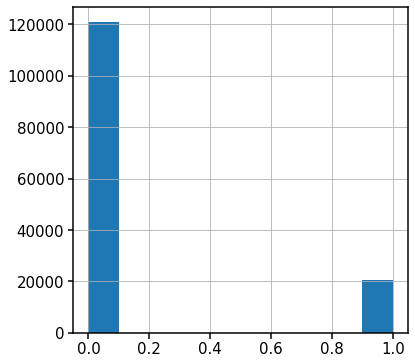

In [9]:
# Plotting numbers of credit default
order = ['Fully Paid', 'Charged Off']
cat_obj = df.loan_status.astype('category')
cat_obj.cat.reorder_categories(order, ordered=True,inplace=True)
cat_obj.cat.codes.hist()


Note that we have an imbalance here. People tend to pay back their debt more often compared to people defaulting. So this is something to account for in our model. Keep in mind, we have assigned defaults as 1 (positive) as we want to investigate whether our algorithm to correctly classify default instances despite this imbalance problem.
Because there are more instances of people paying back their debt and less cases where people default, the algorithm will do better around the first and less around the latter. One way to account for this problem is to penalize more for default instances.

It is therefore important to use the right metric for this purpose.

<font size="4">
Lets investigate the data type of the dataset


In [10]:
df.dtypes.value_counts()

object     12
int64      10
float64     6
dtype: int64

In [11]:
# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

grade                         7
home_ownership                5
emp_length                   11
verification_status           3
loan_status                   2
sub_grade                    35
emp_title                 44331
purpose                      12
title                        12
addr_state                   49
zip_code                    865
earliest_cr_line_month       12
dtype: int64

There seems to be a thing about when to use label encoder or one hot encoder for encoding categorial classes.
One hot encoder increases the dimension of dataset if the number of classes is high, while label encoder is assigns an arbitrary number to a class. Label encoder is compatible with algorithm such as decision trees and random forest.
https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor


In [12]:
# Lets split the data into training set and results
df_train = df.drop('loan_status',axis = 1)
result = df['loan_status']

<font size="4">

Let's make some plots

In [13]:
# Use describe to quickly scan the data
df_train.describe()

id      loan_amnt    funded_amnt       int_rate  \
count  1.412190e+05  141219.000000  141219.000000  141219.000000   
mean   1.080160e+08   12370.868474   12370.868474      12.269223   
std    7.536452e+06    8885.703650    8885.703650       4.628648   
min    7.420990e+05    1000.000000    1000.000000       5.320000   
25%    1.013124e+08    6000.000000    6000.000000       8.240000   
50%    1.093749e+08   10000.000000   10000.000000      11.490000   
75%    1.139333e+08   16000.000000   16000.000000      14.990000   
max    1.201229e+08   40000.000000   40000.000000      30.990000   

         annual_inc            dti    delinq_2yrs       open_acc  \
count  1.412190e+05  141117.000000  141219.000000  141219.000000   
mean   7.688208e+04      18.575513       0.357225      11.490911   
std    7.728840e+04      13.897309       0.968758       5.752859   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    4.500000e+04      11.830000       0.000000       7.000000   
50%    6.400000e+04      17.700000       0.000000      10.000000   
75%    9.100000e+04      24.300000       0.000000      14.000000   
max    1.099920e+07     999.000000      42.000000      76.000000   

             pub_rec  fico_range_low  fico_range_high    total_pymnt  \
count  141219.000000   141219.000000    141219.000000  141219.000000   
mean        0.235344      698.069736       702.069906   13198.655524   
std         0.644369       33.815797        33.816538   10092.465926   
min         0.000000      660.000000       664.000000       0.000000   
25%         0.000000      670.000000       674.000000    5914.378169   
50%         0.000000      690.000000       694.000000   10401.030745   
75%         0.000000      715.000000       719.000000   17450.398616   
max        44.000000      845.000000       850.000000   58605.233259   

          recoveries  funded_amnt_inv    installment  earliest_cr_line_year  
count  141219.000000    141219.000000  141219.000000          141219.000000  
mean      176.627738     12365.678839     413.141071            2000.538993  
std       836.885947      8880.719214     299.817769               7.884476  
min         0.000000      1000.000000      30.120000            1934.000000  
25%         0.000000      6000.000000     193.420000            1997.000000  
50%         0.000000     10000.000000     324.650000            2002.000000  
75%         0.000000     16000.000000     542.220000            2006.000000  
max     29473.070000     40000.000000    1719.830000            2014.000000

Let's look at the income distribution to see if we can detect outliers. I think annual income plays is an important 
indicator in determing whether someone will be able to pay off their debt.

In [14]:
df1 = df[df.annual_inc !=0]

In [15]:
df1.describe()

id      loan_amnt    funded_amnt       int_rate  \
count  1.411200e+05  141120.000000  141120.000000  141120.000000   
mean   1.080160e+08   12369.098285   12369.098285      12.268284   
std    7.536836e+06    8884.628434    8884.628434       4.628550   
min    7.420990e+05    1000.000000    1000.000000       5.320000   
25%    1.013122e+08    6000.000000    6000.000000       8.240000   
50%    1.093842e+08   10000.000000   10000.000000      11.490000   
75%    1.139337e+08   16000.000000   16000.000000      14.990000   
max    1.201229e+08   40000.000000   40000.000000      30.990000   

         annual_inc            dti    delinq_2yrs       open_acc  \
count  1.411200e+05  141117.000000  141120.000000  141120.000000   
mean   7.693601e+04      18.575513       0.357320      11.493134   
std    7.728867e+04      13.897309       0.968948       5.753228   
min    1.000000e+00       0.000000       0.000000       0.000000   
25%    4.500000e+04      11.830000       0.000000       7.000000   
50%    6.438150e+04      17.700000       0.000000      10.000000   
75%    9.100000e+04      24.300000       0.000000      14.000000   
max    1.099920e+07     999.000000      42.000000      76.000000   

             pub_rec  fico_range_low  fico_range_high    total_pymnt  \
count  141120.000000   141120.000000    141120.000000  141120.000000   
mean        0.235431      698.069338       702.069508   13196.756641   
std         0.644533       33.817047        33.817789   10090.944266   
min         0.000000      660.000000       664.000000       0.000000   
25%         0.000000      670.000000       674.000000    5914.264410   
50%         0.000000      690.000000       694.000000   10400.093250   
75%         0.000000      715.000000       719.000000   17447.498954   
max        44.000000      845.000000       850.000000   58605.233259   

          recoveries  funded_amnt_inv    installment  earliest_cr_line_year  
count  141120.000000    141120.000000  141120.000000          141120.000000  
mean      176.613409     12363.909262     413.074773            2000.537096  
std       836.954384      8879.641009     299.773522               7.885415  
min         0.000000      1000.000000      30.120000            1934.000000  
25%         0.000000      6000.000000     193.420000            1997.000000  
50%         0.000000     10000.000000     324.650000            2002.000000  
75%         0.000000     16000.000000     542.220000            2006.000000  
max     29473.070000     40000.000000    1719.830000            2014.000000

(10000.0, 11000000.0)

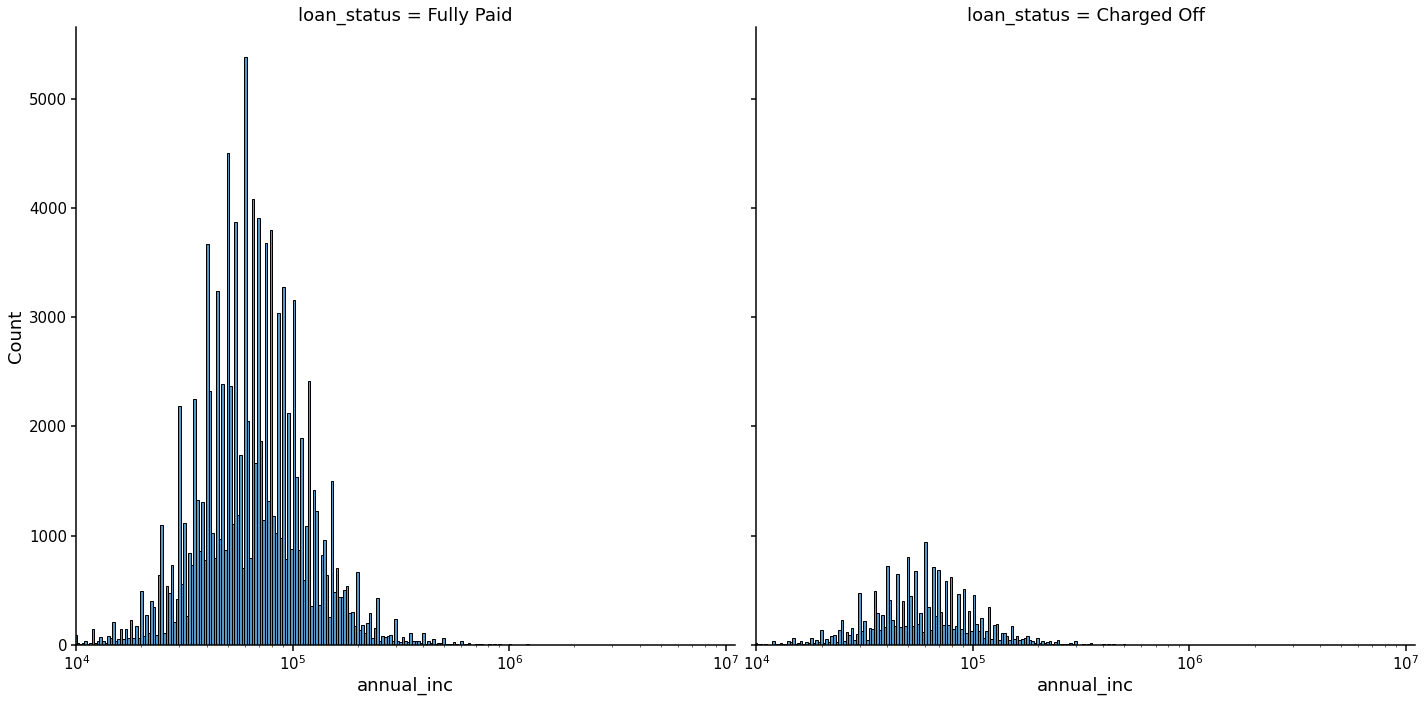

In [16]:
sns.displot(
    df1, x="annual_inc", col='loan_status',
    facet_kws=dict(margin_titles=True),height=10,log_scale=True
)
plt.xlim(0.01e6,11e6)
# plt.ylim(0,20)


- It seems that income above 0.2e7 do not default on their debt. The question now is can we throw away this data?
Although, these datapoints occur naturally, they do not add new information to our model.
- Ok, lets not throw away anything, because these cannot be considered outliers or faulty values

In [17]:
#just checking how many annual income is above 1 million. Common sense suggest that these incomes 
# dont risk to default on their debt
df[df.annual_inc > 0.1e7]

id  loan_amnt  funded_amnt  int_rate grade home_ownership  \
1867     96024284      35000        35000      5.32     A           RENT   
8293     96594406      16000        16000     12.74     C       MORTGAGE   
9685     96681905      35000        35000     11.99     B       MORTGAGE   
13716    96908830      40000        40000      7.99     A       MORTGAGE   
16957    97363918      31050        31050      7.97     A       MORTGAGE   
32363   100081963      35000        35000      6.99     A       MORTGAGE   
32746   100105833      10000        10000     18.06     D       MORTGAGE   
34788   100478875      36125        36125      7.21     A       MORTGAGE   
36483   102086209       1600         1600     11.39     B           RENT   
36596   102115367       5000         5000     11.39     B            OWN   
42505   103208785      35000        35000      6.99     A       MORTGAGE   
49153   104461528      28000        28000     15.99     C       MORTGAGE   
50124   104899493      27950        27950     21.45     D       MORTGAGE   
57699   106966592      24000        24000     10.91     B       MORTGAGE   
68877   109151796      40000        40000     14.08     C           RENT   
72249   109720869      40000        40000      7.24     A       MORTGAGE   
80547   110661952      40000        40000     16.02     C           RENT   
82400   110816566      35000        35000     15.05     C           RENT   
86172   111481306       1800         1800     10.42     B       MORTGAGE   
88765   111743735      35000        35000     10.49     B       MORTGAGE   
88815   111752783       5000         5000     18.06     D           RENT   
99055   113123856      35000        35000     12.74     C       MORTGAGE   
103469  113598119      40000        40000     12.62     C            OWN   
104022  113700553      22000        22000      5.32     A       MORTGAGE   
121135  116828296      21800        21800     11.99     B            OWN   
132905  118606401      35000        35000     18.99     D            OWN   
135271  119224194       4000         4000     11.99     B           RENT   

       emp_length  annual_inc verification_status loan_status  ...  \
1867    10+ years   2000000.0            Verified  Fully Paid  ...   
8293    10+ years   1500000.0            Verified  Fully Paid  ...   
9685       1 year   1050000.0     Source Verified  Fully Paid  ...   
13716   10+ years   1200000.0            Verified  Fully Paid  ...   
16957     7 years   1600000.0            Verified  Fully Paid  ...   
32363   10+ years   1154255.0     Source Verified  Fully Paid  ...   
32746     4 years   1200000.0            Verified  Fully Paid  ...   
34788   10+ years   2000000.0            Verified  Fully Paid  ...   
36483     4 years   3100000.0        Not Verified  Fully Paid  ...   
36596   10+ years   4367398.0     Source Verified  Fully Paid  ...   
42505     8 years   1200000.0            Verified  Fully Paid  ...   
49153   10+ years   8300000.0     Source Verified  Fully Paid  ...   
50124   10+ years   1200000.0     Source Verified  Fully Paid  ...   
57699     3 years   1500000.0     Source Verified  Fully Paid  ...   
68877   10+ years   2000000.0            Verified  Fully Paid  ...   
72249   10+ years   1800000.0            Verified  Fully Paid  ...   
80547     4 years   1460000.0     Source Verified  Fully Paid  ...   
82400   10+ years   1140000.0     Source Verified  Fully Paid  ...   
86172     7 years   3760640.0     Source Verified  Fully Paid  ...   
88765   10+ years   1121869.0     Source Verified  Fully Paid  ...   
88815      1 year  10999200.0     Source Verified  Fully Paid  ...   
99055   10+ years   9522972.0     Source Verified  Fully Paid  ...   
103469  10+ years   1500000.0            Verified  Fully Paid  ...   
104022  10+ years   8900000.0     Source Verified  Fully Paid  ...   
121135    4 years   1200000.0            Verified  Fully Paid  ...   
132905  10+ years   1100000.0     Source Verified  Fully Paid  ...

# Checking for feature correlations

In [18]:
df

id  loan_amnt  funded_amnt  int_rate grade home_ownership  \
0          742099       5000         5000     10.42     B           RENT   
1          806966      15000        15000     10.42     B       MORTGAGE   
2         1581838       6000         6000     15.99     C            OWN   
3        13437957       5000         5000     25.49     E       MORTGAGE   
4        17393271      35000        35000     24.85     E           RENT   
...           ...        ...          ...       ...   ...            ...   
141214  120122034      12000        12000      5.32     A       MORTGAGE   
141215  120122177      10000        10000     10.91     B            OWN   
141216  120122354       9300         9300      7.07     A           RENT   
141217  120122416       2400         2400     16.02     C           RENT   
141218  120122930       6400         6400      6.99     A            OWN   

       emp_length  annual_inc verification_status  loan_status  ...  \
0         7 years     78000.0     Source Verified   Fully Paid  ...   
1       10+ years    110000.0            Verified   Fully Paid  ...   
2       10+ years     70000.0            Verified   Fully Paid  ...   
3       10+ years    215000.0     Source Verified   Fully Paid  ...   
4         2 years    105575.0            Verified  Charged Off  ...   
...           ...         ...                 ...          ...  ...   
141214  10+ years     65000.0     Source Verified   Fully Paid  ...   
141215    2 years     35000.0     Source Verified   Fully Paid  ...   
141216    5 years     28000.0        Not Verified   Fully Paid  ...   
141217  10+ years     75000.0     Source Verified   Fully Paid  ...   
141218  10+ years     60000.0     Source Verified   Fully Paid  ...   

        funded_amnt_inv  installment  sub_grade  \
0                  5000       162.33         B3   
1                 15000       486.98         B3   
2                  6000       210.92         C5   
3                  5000       200.10         E4   
4                 35000      1388.82         E3   
...                 ...          ...        ...   
141214            11750       361.38         A1   
141215            10000       326.97         B4   
141216             9300       287.46         A2   
141217             2400        84.41         C5   
141218             6400       197.59         A2   

                            emp_title             purpose  \
0                    Property Manager    home_improvement   
1                             ANALYST  debt_consolidation   
2                     program manager  debt_consolidation   
3                               Pilot  debt_consolidation   
4                    Registered Nurse  debt_consolidation   
...                               ...                 ...   
141214  Assistant Director of Nursing  debt_consolidation   
141215       Administrative assistant  debt_consolidation   
141216             Graduate Assistant         credit_card   
141217      Member Service Associates    home_improvement   
141218                       Co-owner  debt_consolidation   

                          title  addr_state  zip_code  earliest_cr_line_year  \
0              Home improvement          CA     945xx                   2000   
1            Debt consolidation          RI     029xx                   1994   
2            Debt consolidation          VA     245xx                   1993   
3            Debt consolidation          CT     067xx                   2004   
4            Debt consolidation          CT     068xx                   1989   
...                         ...         ...       ...                    ...   
141214       Debt consolidation          CO     814xx                   2002   
141215       Debt consolidation          CA     935xx                   2010   
141216  Credit card refinancing          TX     775xx                   1984   
141217         Home improvement          CA     950xx                   2005   
141218       Debt conso

Converting categorial employment length to numerical values using label encoder. I used category from pandas

In [19]:
def cat_to_num(df,columns_order):
    '''
    Function that converts categorial classes into 
    numerical values while preserving ordinality
    '''
    df2 = df.copy()
    
    for key, values in columns_order.items():
        _ = df[key].astype('category')
        __=_.cat.reorder_categories(values, ordered=True)
        df2[key] = __.cat.codes
        
        if np.sum(df2[key].unique() == -1) == 1:
            df2[key].replace({-1:np.nan},inplace=True)
    
    return df2

def OHE(df,columns):
    '''
    Function to convert categorial values into binary array
    df: pandas dataframe
    columns: features to turn into categorial values
    Returns updated array
    '''
    df2 = df.copy()
    
    df2.drop(columns,axis=1,inplace=True)
    
    arr = df.loc[:,columns]
    
    dummy_bin = pd.get_dummies(arr)
    
    return pd.concat([df2,dummy_bin],axis=1), list(dummy_bin.columns)
    
    

In [20]:
order_emp = ['< 1 year','1 year',  '2 years', '3 years', '4 years','5 years','6 years', 
         '7 years', '8 years', '9 years', '10+ years' ]
order_stat = ['Fully Paid', 'Charged Off']

cat_columns = ['home_ownership','verification_status']

col_order = {'emp_length':order_emp,
            'loan_status':order_stat}

df2 = cat_to_num(df,col_order)

df2, cat_features = OHE(df2,cat_columns)

In [21]:
df2.corr()['loan_status'].sort_values()

total_pymnt                           -0.217805
fico_range_low                        -0.127499
fico_range_high                       -0.127497
verification_status_Not Verified      -0.082519
home_ownership_MORTGAGE               -0.066391
annual_inc                            -0.039447
emp_length                            -0.024560
home_ownership_ANY                    -0.003327
id                                    -0.002268
home_ownership_NONE                   -0.001547
home_ownership_OWN                     0.004259
open_acc                               0.008040
delinq_2yrs                            0.012669
verification_status_Source Verified    0.016171
funded_amnt_inv                        0.021679
loan_amnt                              0.021679
funded_amnt                            0.021679
pub_rec                                0.033592
dti                                    0.035903
earliest_cr_line_year                  0.036889
installment                            0

We see correlations with respect to the 'loan_status' variable. 'recoveries' has a high correlation, but this feature can not be determined beforehand, when the loan is provided. The same applies for 'total payment'. Lets check this

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='recoveries', ylabel='Density'>

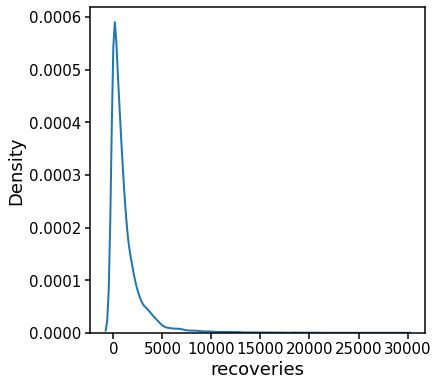

In [22]:
# KDE plot of loans that were repaid on time
sns.kdeplot(df2.loc[df2['loan_status'] == 0, 'recoveries'], label = 'target == 0',color='r')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df2.loc[df2['loan_status'] == 1, 'recoveries'], label = 'target == 1')



The error says it all. Recoveries of zero means people pay off their debt, while a nonzero recovery means dafualt. This data cannot be known beforehand.

<AxesSubplot:>

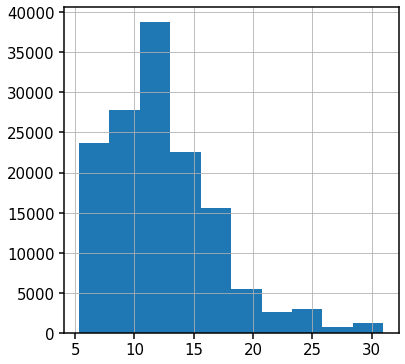

In [23]:
df2.int_rate.hist()

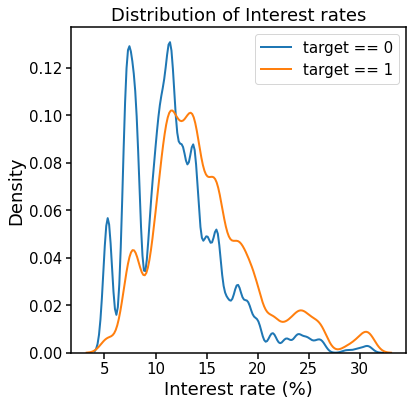

In [24]:
# Interest rate seems interesting 
# KDE plot of loans that were repaid on time

sns.kdeplot(df2.loc[df2['loan_status'] == 0, 'int_rate'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df2.loc[df2['loan_status'] == 1, 'int_rate'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Interest rate (%)'); plt.ylabel('Density'); plt.title('Distribution of Interest rates');
plt.legend()

kde plot for default skews sligthtly towards higher interest rates, which makes sense.

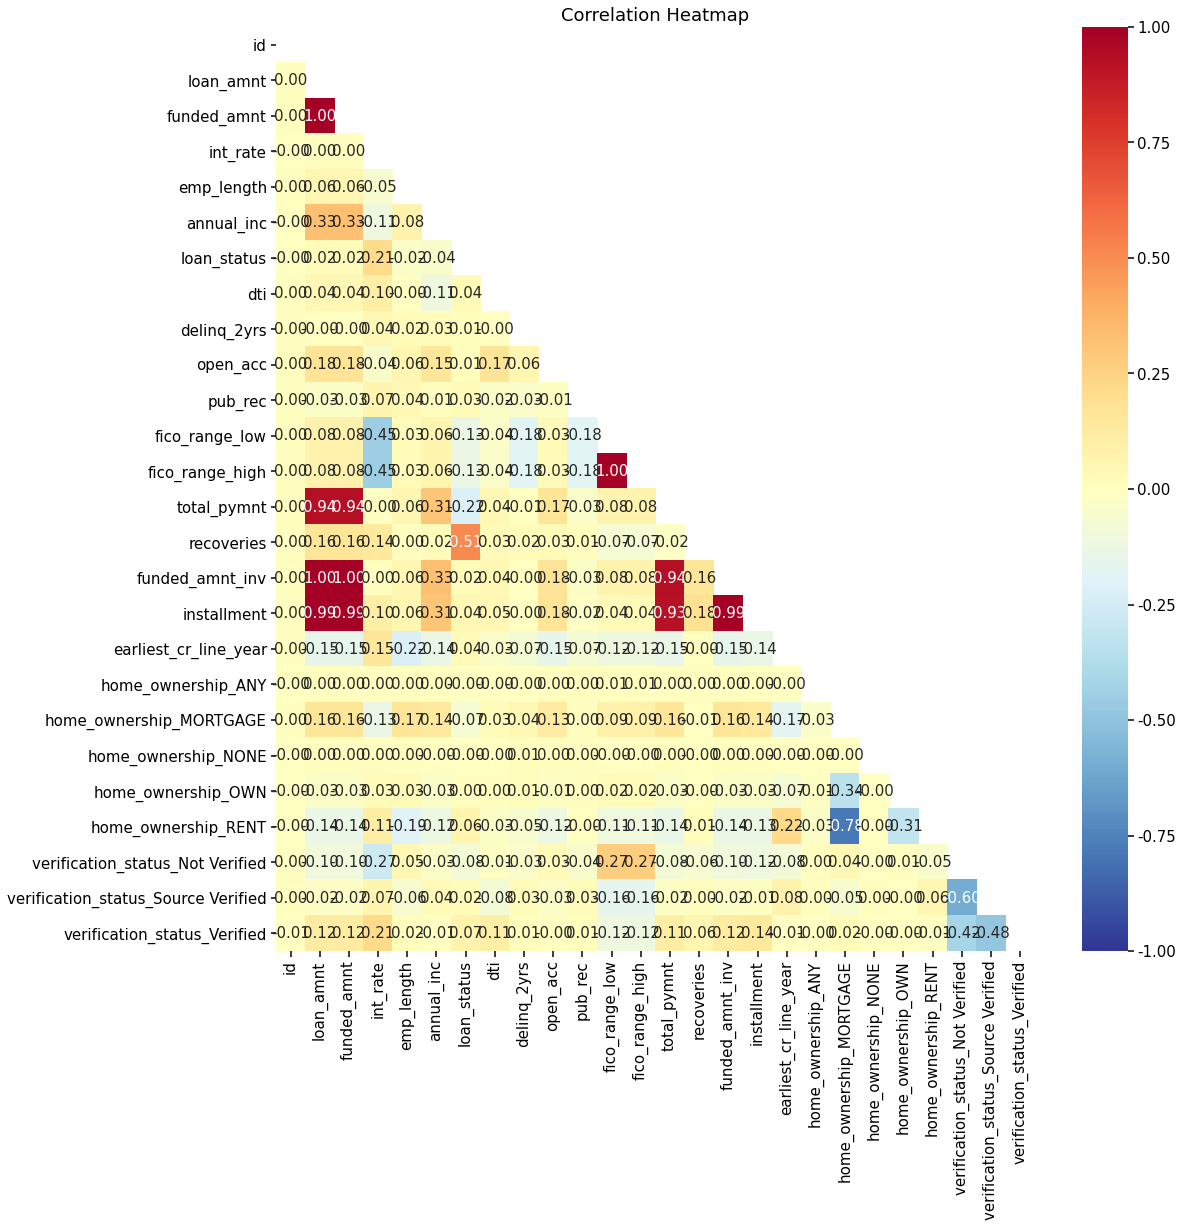

In [25]:
plt.figure(figsize = (17, 17))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df2.corr(), dtype=bool))


sns.heatmap(df2.corr(), mask=mask, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True,fmt='.2f', vmax = 1)
plt.title('Correlation Heatmap');

In [26]:
mp = df2.groupby('emp_length').mean()
mp

id     loan_amnt   funded_amnt   int_rate    annual_inc  \
emp_length                                                                      
0.0         1.079600e+08  12877.880897  12877.880897  12.405461  69566.814218   
1.0         1.080326e+08  11492.693790  11492.693790  12.581575  71686.034715   
2.0         1.080738e+08  11709.362010  11709.362010  12.488625  73210.358342   
3.0         1.079873e+08  11741.151372  11741.151372  12.452165  73910.272593   
4.0         1.080490e+08  11894.232948  11894.232948  12.528757  76928.658768   
5.0         1.078866e+08  12162.650324  12162.650324  12.366251  76982.462202   
6.0         1.079458e+08  12335.518876  12335.518876  12.290442  78133.943665   
7.0         1.080051e+08  12811.447446  12811.447446  12.222215  81054.575983   
8.0         1.078466e+08  12847.698394  12847.698394  12.174932  81197.547219   
9.0         1.081792e+08  12564.318320  12564.318320  11.902804  80971.625529   
10.0        1.080341e+08  13375.094083  13375.094083  11.918725  87499.612638   

            loan_status        dti  delinq_2yrs   open_acc   pub_rec  ...  \
emp_length                                                            ...   
0.0            0.141145  19.654496     0.334416  11.059861  0.180201  ...   
1.0            0.154095  17.735343     0.368098  11.260888  0.188268  ...   
2.0            0.146897  17.616132     0.367874  11.434828  0.202939  ...   
3.0            0.151630  17.784786     0.345283  11.327959  0.209434  ...   
4.0            0.151824  18.084281     0.329934  11.385112  0.232835  ...   
5.0            0.143386  18.001259     0.320537  11.412234  0.237512  ...   
6.0            0.131881  18.289320     0.322634  11.665225  0.251455  ...   
7.0            0.147703  18.476829     0.344705  11.597318  0.267008  ...   
8.0            0.140734  18.474464     0.362503  11.653321  0.233997  ...   
9.0            0.129641  18.439744     0.348955  11.813552  0.240008  ...   
10.0           0.127488  18.359318     0.401434  12.005866  0.254510  ...   

            installment  earliest_cr_line_year  home_ownership_ANY  \
emp_length                                                           
0.0          429.976542            2002.261717            0.001083   
1.0          384.765900            2002.776203            0.000521   
2.0          392.103101            2002.681562            0.001262   
3.0          393.259702            2002.631304            0.001801   
4.0          398.814618            2002.461364            0.001360   
5.0          407.247439            2002.037003            0.001966   
6.0          412.536707            2001.656411            0.001330   
7.0          427.799554            2001.488858            0.001183   
8.0          429.100643            2000.998082            0.001199   
9.0          417.827202            2000.875837            0.001623   
10.0         444.865222            1998.490116            0.001129   

            home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OWN  \
emp_length                                                                     
0.0                        0.394277             0.000000            0.095746   
1.0                        0.327151             0.000000            0.096791   
2.0                        0.359561             0.000000            0.106072   
3.0                        0.377959             0.000000            0.105317   
4.0                        0.400974             0.000000            0.107410   
5.0                        0.427266             0.000000            0.117599   
6.0                        0.455347             0.000000            0.108265   
7.0                        0.466377             0.000000            0.110235   
8.0                        0.482378             0.000000            0.107648   
9.0                        0.513086             0.000000            0.110367   
10.0                       0.568592             0.000022            0.126182   

            ho

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

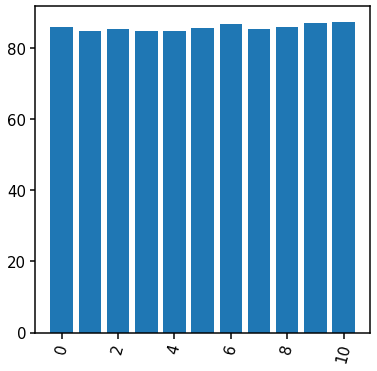

In [27]:
plt.bar(mp.index, 100 - 100* mp['loan_status'])
plt.xticks(rotation = 75)

We see that the highest default rate is with people with 1 year employment and the lowest is with 10+years. But the  difference between the employement durations is within 3%. So for now, we can leave this feature out.

In [28]:
emp_cut = df2[df2['loan_status']==1].groupby('emp_length').count()

In [29]:
emp_cut

id  loan_amnt  funded_amnt  int_rate  grade  annual_inc  \
emp_length                                                              
0.0         1825       1825         1825      1825   1825        1825   
1.0         1479       1479         1479      1479   1479        1479   
2.0         1979       1979         1979      1979   1979        1979   
3.0         1768       1768         1768      1768   1768        1768   
4.0         1340       1340         1340      1340   1340        1340   
5.0         1240       1240         1240      1240   1240        1240   
6.0          793        793          793       793    793         793   
7.0          749        749          749       749    749         749   
8.0          587        587          587       587    587         587   
9.0          639        639          639       639    639         639   
10.0        5759       5759         5759      5759   5759        5759   

            loan_status   dti  delinq_2yrs  open_acc  ...  \
emp_length                                            ...   
0.0                1825  1824         1825      1825  ...   
1.0                1479  1479         1479      1479  ...   
2.0                1979  1979         1979      1979  ...   
3.0                1768  1768         1768      1768  ...   
4.0                1340  1340         1340      1340  ...   
5.0                1240  1240         1240      1240  ...   
6.0                 793   793          793       793  ...   
7.0                 749   749          749       749  ...   
8.0                 587   587          587       587  ...   
9.0                 639   639          639       639  ...   
10.0               5759  5759         5759      5759  ...   

            earliest_cr_line_year  earliest_cr_line_month  home_ownership_ANY  \
emp_length                                                                      
0.0                          1825                    1825                1825   
1.0                          1479                    1479                1479   
2.0                          1979                    1979                1979   
3.0                          1768                    1768                1768   
4.0                          1340                    1340                1340   
5.0                          1240                    1240                1240   
6.0                           793                     793                 793   
7.0                           749                     749                 749   
8.0                           587                     587                 587   
9.0                           639                     639                 639   
10.0                         5759                    5759                5759   

            home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OWN  \
emp_length                                                                     
0.0                            1825                 1825                1825   
1.0                            1479                 1479                1479   
2.0                            1979                 1979                1979   
3.0                            1768                 1768                1768   
4.0                            1340                 1340                1340   
5.0                            1240                 1240                1240   
6.0                             793                  793                 793   
7.0                             749                  749                 749   
8.0                             587                  587                 587   
9.0                             639                  639                 639   
10.0                           5759                 5759                5759   

            home_ownership_RENT  verification_status_Not Verified  \
emp_length                                                          
0.0                        1825      

In [30]:
tot_def = emp_cut.loan_status.sum()
tot_def

18158

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

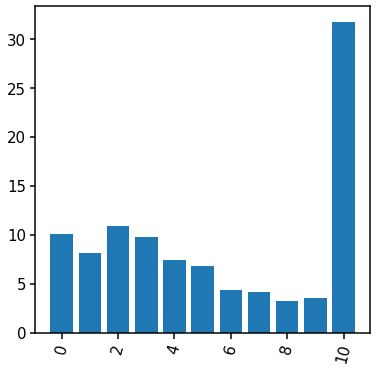

In [31]:
plt.bar(mp.index, 100* emp_cut['loan_status']/tot_def)
plt.xticks(rotation = 75)

This is interesting, because from all the defaults, people who are employed the longest (10+ years) perform worse. But there is a trend here. In general, default is smaller with people who are employed longer, but in the category of 10+ years it explodes.

In [32]:
def conv(x, N):
    '''
    Function to smooth out data
    '''
    x_conv = np.convolve(x,np.ones(N),'valid')
    return x_conv/N



Text(0, 0.5, 'default ratio (%)')

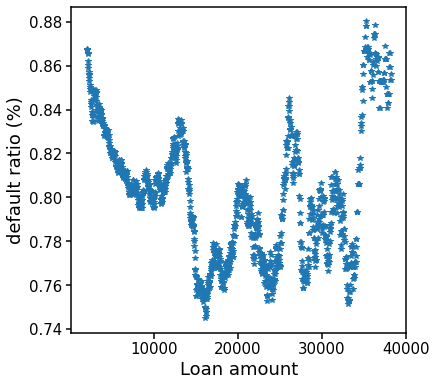

In [33]:
# plottin default risk with respect to loan amount
a = df2.groupby('loan_amnt').mean()
x = conv(a.index.values,80)
y=conv(1-a['loan_status'],80)
plt.plot(x,y,'*')
plt.xlabel('Loan amount')
plt.ylabel('default ratio (%)')


There seems to be no trend or pattern here. We do see higher default above 15000, but no specific pattern.
So we see a general trend here, when the loan amount increases, the default risk also increases. 

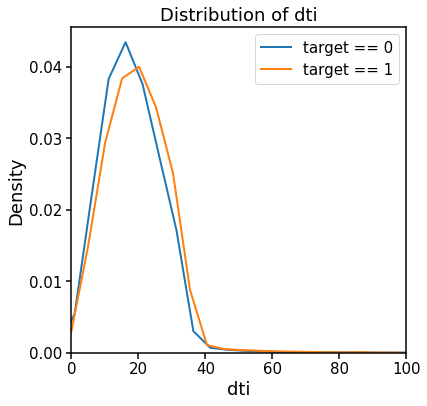

In [34]:
# Interest rate seems interesting 
# KDE plot of loans that were repaid on time

sns.kdeplot(df2.loc[df2['loan_status'] == 0, 'dti'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df2.loc[df2['loan_status'] == 1, 'dti'], label = 'target == 1')

# Labeling of plot
plt.xlabel('dti'); plt.ylabel('Density'); plt.title('Distribution of dti');
plt.xlim(0,100)
plt.legend()

Ok, there seems to be no difference in the KDE plot of the DTI ratio.

Let's choose the features:
- loan_amnt
- int_rate:
I noticed that that the grade class is related to the interest rate and loans with the same grade have the more or less the interest rate.
- home_ownership
- emp_length:
converted this array into numerical value using label encoding
- annual_inc
- verification_status
- dti
- delinq_2yrs
- open_acc
- pub_rec
- fico_range_low: this correlated with the interest rate
- installment
- zip_code (let's leave it out now, because of no ordinality). We can use one hot encoding but dimension of dataset will explode 

<AxesSubplot:xlabel='zip_code'>

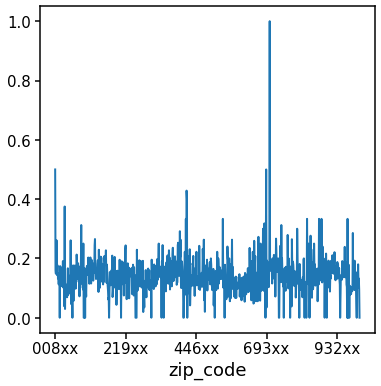

In [35]:
df2.groupby('zip_code').mean()['loan_status'].plot()

In [36]:
df2.groupby('addr_state').count()

id  loan_amnt  funded_amnt  int_rate  grade  emp_length  \
addr_state                                                               
AK            290        290          290       290    290         270   
AL           1579       1579         1579      1579   1579        1438   
AR           1079       1079         1079      1079   1079         962   
AZ           3410       3410         3410      3410   3410        3081   
CA          19492      19492        19492     19492  19492       18165   
CO           2909       2909         2909      2909   2909        2731   
CT           2320       2320         2320      2320   2320        2168   
DC            318        318          318       318    318         303   
DE            366        366          366       366    366         325   
FL          10187      10187        10187     10187  10187        9202   
GA           4484       4484         4484      4484   4484        4110   
HI            642        642          642       642    642         607   
ID            417        417          417       417    417         375   
IL           5802       5802         5802      5802   5802        5420   
IN           2412       2412         2412      2412   2412        2221   
KS           1169       1169         1169      1169   1169        1081   
KY           1364       1364         1364      1364   1364        1220   
LA           1560       1560         1560      1560   1560        1450   
MA           3165       3165         3165      3165   3165        2993   
MD           3260       3260         3260      3260   3260        3055   
ME            489        489          489       489    489         443   
MI           3653       3653         3653      3653   3653        3261   
MN           2456       2456         2456      2456   2456        2334   
MO           2239       2239         2239      2239   2239        2067   
MS            867        867          867       867    867         781   
MT            383        383          383       383    383         352   
NC           3778       3778         3778      3778   3778        3451   
ND            315        315          315       315    315         299   
NE            725        725          725       725    725         688   
NH            719        719          719       719    719         672   
NJ           5117       5117         5117      5117   5117        4800   
NM            722        722          722       722    722         656   
NV           2087       2087         2087      2087   2087        1867   
NY          12170      12170        12170     12170  12170       11273   
OH           4562       4562         4562      4562   4562        4163   
OK           1251       1251         1251      1251   1251        1120   
OR           1687       1687         1687      1687   1687        1552   
PA           4771       4771         4771      4771   4771        4386   
RI            628        628          628       628    628         583   
SC           1663       1663         1663      1663   1663        1474   
SD            278        278          278       278    278         260   
TN           2353       2353         2353      2353   2353        2163   
TX          12192      12192        12192     12192  12192       11430   
UT            831        831          831       831    831         786   
VA           3708       3708         3708      3708   3708        3481   
VT            364        364          364       364    364         338   
WA           2910       2910         2910      2910   2910        2716   
WI           1831       1831         1831      1831   1831        1688   
WY            245        245          245       245    245         230   

            annual_inc  loan_status    dti  delinq_2yrs  ...  \
addr_state                                               ...   
AK                 290          290    290          290  ...   
AL                1579         1579   1579      

In [37]:
df2.groupby('zip_code').mean()

id     loan_amnt   funded_amnt   int_rate  emp_length  \
zip_code                                                                    
008xx     1.034731e+08   8700.000000   8700.000000   9.215000    5.000000   
010xx     1.087750e+08  12391.055046  12391.055046  11.883578    6.202970   
011xx     1.087701e+08  11016.554054  11016.554054  12.602973    5.880597   
012xx     1.090707e+08  11646.022727  11646.022727  12.096364    6.900000   
013xx     1.087656e+08  12556.521739  12556.521739  12.482609    6.619048   
...                ...           ...           ...        ...         ...   
995xx     1.081119e+08  15751.166667  15751.166667  12.961200    5.942857   
996xx     1.076972e+08  16298.305085  16298.305085  12.348305    6.113208   
997xx     1.066674e+08  15640.566038  15640.566038  12.246981    5.326531   
998xx     1.054772e+08  14641.666667  14641.666667  11.139524    5.000000   
999xx     1.062957e+08   9800.000000   9800.000000  11.926667    5.166667   

            annual_inc  loan_status        dti  delinq_2yrs   open_acc  ...  \
zip_code                                                                ...   
008xx     62500.000000     0.500000  17.055000     0.500000  10.000000  ...   
010xx     65830.695596     0.160550  19.137477     0.339450  11.275229  ...   
011xx     61864.412162     0.148649  16.872027     0.500000  11.500000  ...   
012xx     59686.840909     0.181818  20.808182     0.840909  12.977273  ...   
013xx     76493.652174     0.260870  18.047826     0.826087  11.608696  ...   
...                ...          ...        ...          ...        ...  ...   
995xx     78029.173333     0.180000  19.029533     0.186667  11.073333  ...   
996xx     92147.433559     0.118644  23.032373     0.169492  10.677966  ...   
997xx     80148.998113     0.132075  19.332453     0.754717  10.471698  ...   
998xx     70354.666667     0.095238  21.013810     0.190476  10.523810  ...   
999xx     59665.333333     0.000000  17.380000     0.333333   6.500000  ...   

          installment  earliest_cr_line_year  home_ownership_ANY  \
zip_code                                                           
008xx      277.310000            2004.500000            0.000000   
010xx      412.473349            2000.522936            0.004587   
011xx      373.075270            2002.716216            0.000000   
012xx      390.394773            1996.931818            0.000000   
013xx      426.805652            1999.000000            0.000000   
...               ...                    ...                 ...   
995xx      533.249533            2000.953333            0.000000   
996xx      548.756441            2000.813559            0.000000   
997xx      527.729811            1999.886792            0.000000   
998xx      479.316667            2000.714286            0.000000   
999xx      324.490000            2003.500000            0.000000   

          home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OWN  \
zip_code                                                                     
008xx                    0.500000                  0.0            0.000000   
010xx                    0.449541                  0.0            0.123853   
011xx                    0.459459                  0.0            0.108108   
012xx                    0.568182                  0.0            0.068182   
013xx                    0.347826                  0.0            0.130435   
...                           ...                  ...                 ...   
995xx                    0.473333                  0.0            0.120000   
996xx                    0.627119                  0.0            0.135593   
997xx                    0.490566                  0.0            0.150943   
998xx                    0.571429                  0.0            0.190476   
999xx                    0.166667                  0.0            0.166667   

          home_ownership_RENT  verification_status_Not Verified  \
zip_code               

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141219 entries, 0 to 141218
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   141219 non-null  int64  
 1   loan_amnt                            141219 non-null  int64  
 2   funded_amnt                          141219 non-null  int64  
 3   int_rate                             141219 non-null  float64
 4   grade                                141219 non-null  object 
 5   emp_length                           130491 non-null  float64
 6   annual_inc                           141219 non-null  float64
 7   loan_status                          141219 non-null  int8   
 8   dti                                  141117 non-null  float64
 9   delinq_2yrs                          141219 non-null  int64  
 10  open_acc                             141219 non-null  int64  
 11  pub_rec      

# Logistic Regression 

Let's try a simple logistic regression scheme

In [39]:
from sklearn.pipeline import FeatureUnion

In [40]:
def select_features(df,feature):
    
    return df.loc[:,features]

def apply_transforms(df,oper):
    '''
    applies transforms to datasets with sklearn
    df: pandas dataframe
    oper: dictionary of operators to apply in order
    
    '''
    union = FeatureUnion(list(oper.items()))
    return union.fit_transform(df)

In [41]:
# preparing the data
features = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 
            'dti', 'delinq_2yrs', 'open_acc', 'pub_rec','fico_range_low', 'installment','earliest_cr_line_year']

feature_ = features.copy()
[feature_.append(items) for items in cat_features]
# actually fico score and interest rate are related 
df_train = df2.loc[:,feature_]

target = df2.loan_status

In [42]:
features

['loan_amnt',
 'int_rate',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'open_acc',
 'pub_rec',
 'fico_range_low',
 'installment',
 'earliest_cr_line_year']

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141219 entries, 0 to 141218
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            141219 non-null  int64  
 1   int_rate                             141219 non-null  float64
 2   emp_length                           130491 non-null  float64
 3   annual_inc                           141219 non-null  float64
 4   dti                                  141117 non-null  float64
 5   delinq_2yrs                          141219 non-null  int64  
 6   open_acc                             141219 non-null  int64  
 7   pub_rec                              141219 non-null  int64  
 8   fico_range_low                       141219 non-null  int64  
 9   installment                          141219 non-null  float64
 10  earliest_cr_line_year                141219 non-null  int64  
 11  home_ownershi

In [44]:
# training set operations
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = MinMaxScaler(feature_range = (0, 1))
opers = {'imp': imputer,
        'minmaxsc': scaler }

# df_train_sc = apply_transforms(df_train,opers)
df_train_sc = imputer.fit_transform(df_train)
df_train_sc = scaler.fit_transform(df_train_sc)

In [45]:
# test set operations
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = MinMaxScaler(feature_range = (0, 1))
df_test = pd.read_csv('prediction_project/loans_test.csv')
print('testing dataset shape: ',df_test.shape)
# df_test = df_test.loc[:,features]


order_emp = ['< 1 year','1 year',  '2 years', '3 years', '4 years','5 years','6 years', 
         '7 years', '8 years', '9 years', '10+ years' ]
order_stat = ['Fully Paid', 'Charged Off']

cat_columns = ['home_ownership','verification_status']

col_order = {'emp_length':order_emp}
df_test_num = cat_to_num(df_test,col_order)
df_test_num,_ = OHE(df_test_num,cat_columns)

df_test_num = df_test_num.loc[:,feature_]


# df_train_sc = apply_transforms(df_train,opers)
df_test_sc = imputer.fit_transform(df_test_num)
df_test_sc = scaler.fit_transform(df_test_sc)

df_test_num.head()
print(df_test_num.shape)

testing dataset shape:  (94147, 28)
(94147, 19)


In [46]:
df_label = pd.read_csv('prediction_project/loans_test_labels.csv')
# df_label.loc[:,('loan_status')] = df_label.loan_status.map(lambda x: 0 if x == 'Fully Paid' else 1)
order_stat = ['Fully Paid', 'Charged Off']
col_order = {'loan_status':order_stat}
df_label = cat_to_num(df_label,col_order)
labels = df_label['loan_status']

In [47]:
labels[:11]

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     1
10    0
Name: loan_status, dtype: int8

In [48]:
log_reg = LogisticRegression(C=0.01)

# Train on the training data
log_reg.fit(df_train_sc, target)

LogisticRegression(C=0.01)

In [49]:
log_reg.coef_

array([[ 5.91128761e-02,  2.04051255e+00, -5.48687830e-02,
        -8.35104970e-02,  1.10267787e-01,  6.32685773e-03,
         2.99570365e-01,  1.17154197e-01, -1.03817332e+00,
         3.48572021e-01,  6.89956026e-02, -4.06352813e-02,
        -1.55423054e-01, -3.18141518e-03,  3.67940968e-02,
         1.62762777e-01, -1.44227971e-01, -1.82281916e-03,
         1.46367913e-01]])

In [50]:
log_reg_pred = log_reg.predict_proba(df_test_sc)
log_reg_pred[:10]

array([[0.84301738, 0.15698262],
       [0.91804058, 0.08195942],
       [0.87641399, 0.12358601],
       [0.9565478 , 0.0434522 ],
       [0.84854277, 0.15145723],
       [0.76356329, 0.23643671],
       [0.9080292 , 0.0919708 ],
       [0.92341997, 0.07658003],
       [0.85551533, 0.14448467],
       [0.87923334, 0.12076666]])

Now what is the metric to use to measure the performance of our model?
We have to be carefull here, because our data is highly imbalanced with 14% instances of default.
Let's see what the ROC AUC does

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18 <br>
Nice blog explaning how to handle and benchmark imbalanced datasets

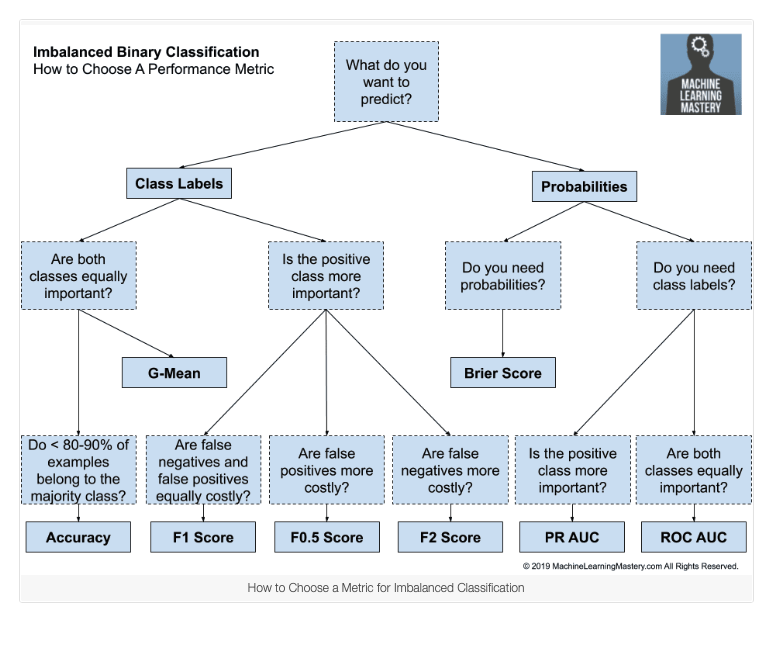

Ref: https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

In [51]:
fpr, tpr, thresholds = roc_curve(labels,log_reg_pred[:,1])

Text(0.5, 1.0, 'ROC curve')

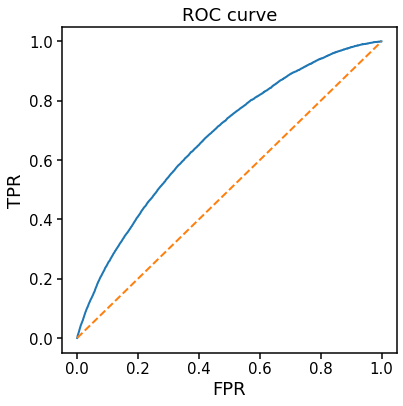

In [52]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [53]:
print('AUC of ROC:', roc_auc_score(labels,log_reg_pred[:,1]))

AUC of ROC: 0.6758339054239481


In [54]:
prre = pr_curve(labels.values,log_reg_pred[:,1])

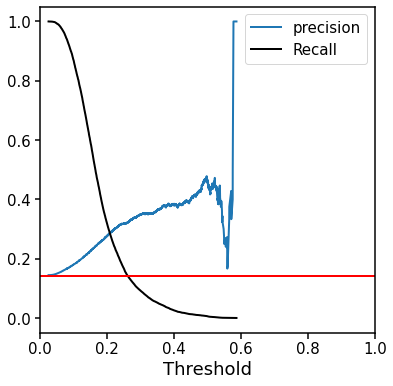

In [55]:
plt.plot(prre[2],prre[0][:-1],label='precision')
plt.plot(prre[2],prre[1][:-1],'k',label='Recall')
# plt.plot(pr,re)
plt.xlabel('Threshold')
# plt.ylabel('P')
plt.axhline(0.14,color='r')
plt.xlim(0,1)
plt.legend()

In [56]:
print('AUC of precision-recall curve:',auc(prre[1],prre[0]))

AUC of precision-recall curve: 0.25091054137686164


In [57]:
print('recall score:',recall_score(labels.values,log_reg.predict(df_test_sc)))

recall score: 0.006024096385542169


In [58]:
print('precision score:',precision_score(labels.values,log_reg.predict(df_test_sc)))

precision score: 0.4632768361581921


In [59]:
print('f1 score (harmonic mean between precision and recall):',
      f1_score(labels.values,log_reg.predict(df_test_sc)))

f1 score (harmonic mean between precision and recall): 0.011893538327652477


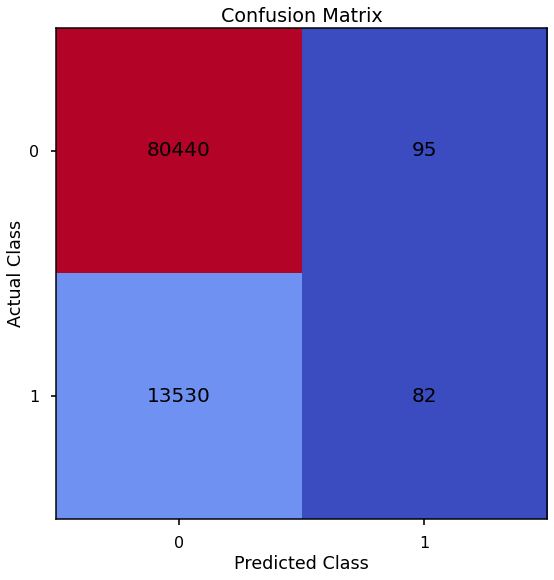

In [60]:
# Let's plot the confusion matrix
conf_matrix = confusion_matrix(labels.values,log_reg.predict(df_test_sc))

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

Looks very bad! Let's try to improve our model with a polynomial logistic regression with higher order terms

# Higher order logistic regression

In [61]:
# Make a new dataframe for polynomial features
poly_features = imputer.fit_transform(df_train)
poly_features_test = imputer.fit_transform(df_test_num)


poly_target = target


# Need to impute missing values
# poly_features = imputer.fit_transform(poly_features)
# poly_features_test = imputer.transform(poly_features_test)

                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 2)#,include_bias=False)

In [62]:
#  Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)


Polynomial Features shape:  (141219, 210)


In [63]:
print('Polynomial Features shape: ', poly_features_test.shape)

Polynomial Features shape:  (94147, 210)


In [64]:
# all features with interaction terms
poly_transformer.get_feature_names_out(feature_)

array(['1', 'loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'open_acc', 'pub_rec', 'fico_range_low',
       'installment', 'earliest_cr_line_year', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified',
       'verification_status_Verified', 'loan_amnt^2',
       'loan_amnt int_rate', 'loan_amnt emp_length',
       'loan_amnt annual_inc', 'loan_amnt dti', 'loan_amnt delinq_2yrs',
       'loan_amnt open_acc', 'loan_amnt pub_rec',
       'loan_amnt fico_range_low', 'loan_amnt installment',
       'loan_amnt earliest_cr_line_year', 'loan_amnt home_ownership_ANY',
       'loan_amnt home_ownership_MORTGAGE',
       'loan_amnt home_ownership_NONE', 'loan_amnt home_ownership_OWN',
       'loan_amnt home_ownership_RENT',
       'loan_amnt verification_status_Not Verified',
       'loan_amnt verific

In [65]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(feature_))

# # Add in the target
poly_features['target'] = target

# Find the correlations with the target
poly_corrs = poly_features.corr()['target'].sort_values()

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [66]:
# Display most negative and most positive
print(poly_corrs.head(15))
print(poly_corrs.tail(10))

fico_range_low                                             -0.127499
fico_range_low^2                                           -0.126671
fico_range_low earliest_cr_line_year                       -0.125293
fico_range_low verification_status_Not Verified            -0.086791
annual_inc verification_status_Not Verified                -0.083077
verification_status_Not Verified^2                         -0.082519
verification_status_Not Verified                           -0.082519
earliest_cr_line_year verification_status_Not Verified     -0.082455
home_ownership_MORTGAGE verification_status_Not Verified   -0.076895
emp_length verification_status_Not Verified                -0.072598
fico_range_low home_ownership_MORTGAGE                     -0.071879
open_acc verification_status_Not Verified                  -0.068071
home_ownership_MORTGAGE                                    -0.066391
home_ownership_MORTGAGE^2                                  -0.066391
earliest_cr_line_year home_ownersh

In [67]:
poly_features.drop('target',axis=1,inplace=True)
poly_features_sc = scaler.fit_transform(poly_features)
poly_features_test_sc = scaler.fit_transform(poly_features_test)
# poly_features_test_sc = np.insert(poly_features_test_sc, 0, np.ones(len(poly_features_test_sc)),axis=1)

In [68]:
# Now fit the data
log_reg = LogisticRegression(C = 0.01,max_iter=1000)#,tol=1e-6)

# Train on the training data
log_reg.fit(poly_features_sc, target)

LogisticRegression(C=0.01, max_iter=1000)

In [69]:
log_reg_pred = log_reg.predict_proba(poly_features_test_sc)
log_reg_pred[:10]

array([[0.84854877, 0.15145123],
       [0.91981027, 0.08018973],
       [0.86885699, 0.13114301],
       [0.96303659, 0.03696341],
       [0.82339709, 0.17660291],
       [0.74101961, 0.25898039],
       [0.91170316, 0.08829684],
       [0.93304804, 0.06695196],
       [0.85117259, 0.14882741],
       [0.86992561, 0.13007439]])

In [70]:
poly_features_sc.shape

(141219, 210)

Text(0.5, 1.0, 'ROC curve')

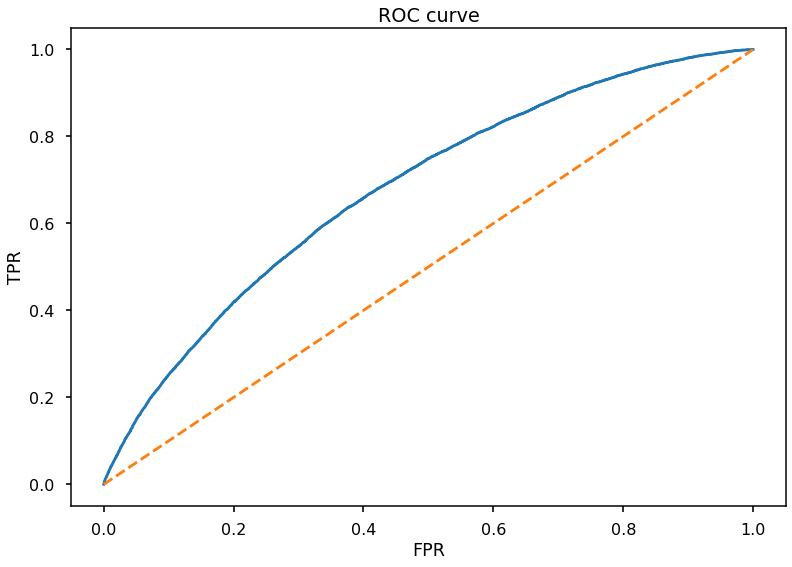

In [71]:
fpr, tpr, thresholds = roc_curve(labels,log_reg_pred[:,1])
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [72]:
print('AUC of ROC:', roc_auc_score(labels,log_reg_pred[:,1]))

AUC of ROC: 0.6789392815140287


The AUC of ROC increases with 0.001 but this is not a huge improvement. However the recall score is doubled. This is a better indicator for our imbalanced dataset. Adding higher order polynomial terms seems to improve the predicting capabilities of our classifier, but not a lot. Let's investigate how the randomforest classifier performs on our imbalanced dataset

In [73]:
print('recall score:',recall_score(labels.values,log_reg.predict(poly_features_test_sc)))

recall score: 0.0073464590067587425


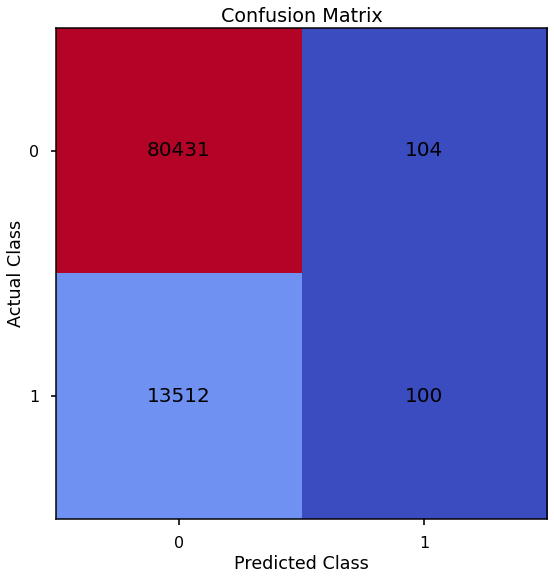

In [74]:
# Let's plot the confusion matrix
conf_matrix = confusion_matrix(labels.values,log_reg.predict(poly_features_test_sc))

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

In [75]:
prre = pr_curve(labels.values,log_reg_pred[:,1])

In [76]:
plt.plot(prre[2],prre[0][:-1],label='precision')
plt.plot(prre[2],prre[1][:-1],'k',label='Recall')
# plt.plot(pr,re)
plt.xlabel('Threshold')
# plt.ylabel('P')
plt.axhline(0.14,color='r')
plt.xlim(0,1)
plt.legend()

# Random Forest classifier

Lets see how the random forest clasifier performs with our datasets

In [77]:
def plot_feature_importance(features,values):
    feature_fr = pd.DataFrame({'features': features,
                               'importance': values})
    
    feature_fr.sort_values(by='importance',inplace=True)
    
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(feature_fr['features'], 
            feature_fr['importance']/feature_fr['importance'].sum(), 
            align = 'center', edgecolor = 'k')
    
    
    
    # Plot labeling
    plt.xlabel('Importance'); plt.title('Feature Importances')
    plt.show()
    


In [78]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = None, bootstrap = False, max_features=None,
                            class_weight= 'balanced', verbose = 1, n_jobs = -1, max_samples = None, 
                            oob_score=False)

In [79]:
rf.fit(df_train_sc,target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.3s finished


RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features=None, n_estimators=10, n_jobs=-1,
                       verbose=1)

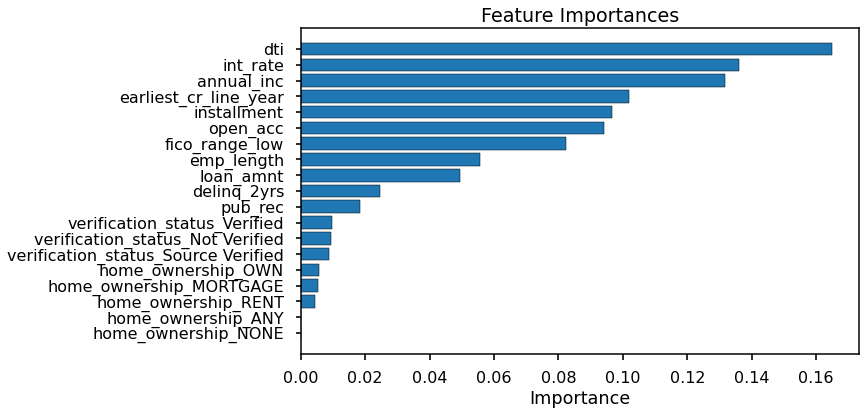

In [81]:
plot_feature_importance(feature_,rf.feature_importances_)

In [82]:
predictions = rf.predict_proba(df_test_sc)[:, 1]
predictions_cl = rf.predict(df_test_sc)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


In [83]:
predictions[:10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [84]:
predictions_cl[:15]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int8)

In [85]:
labels[:15]

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     1
10    0
11    0
12    1
13    0
14    0
Name: loan_status, dtype: int8

Text(0.5, 1.0, 'ROC curve')

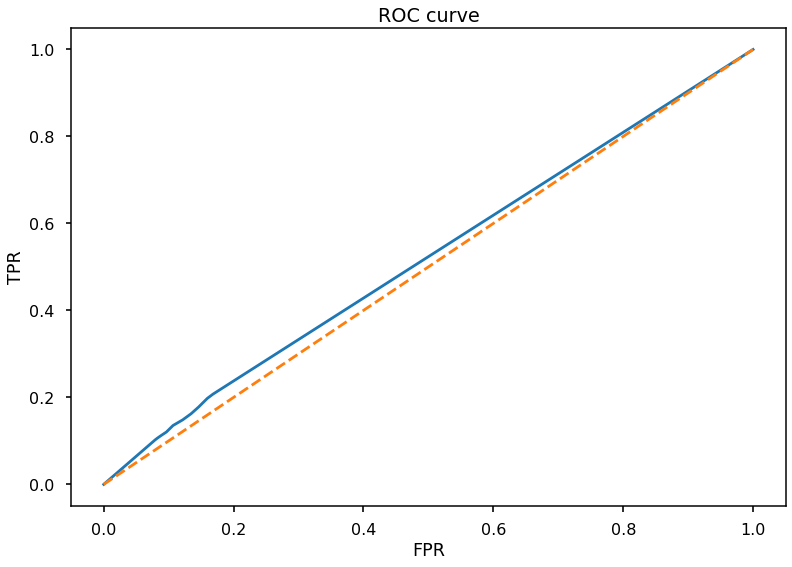

In [86]:
fpr, tpr, thresholds = roc_curve(labels,predictions)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [87]:
print('AUC of ROC:', roc_auc_score(labels,predictions))

AUC of ROC: 0.5198271943353551


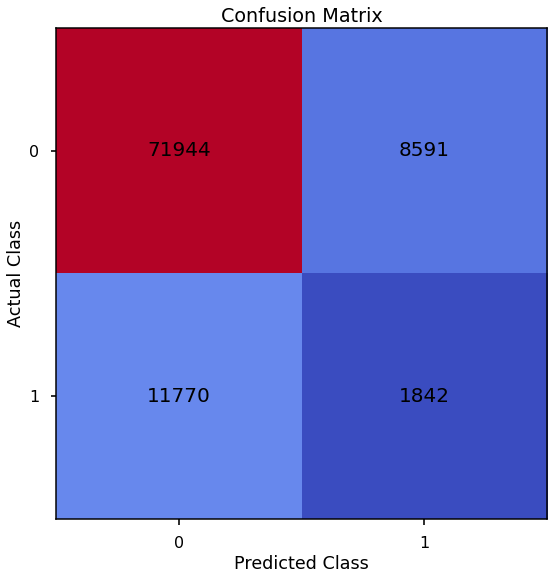

In [88]:
# Let's plot the confusion matrix
conf_matrix = confusion_matrix(labels.values,predictions_cl)

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

In [89]:
print('recall score:',recall_score(labels.values,predictions_cl))

recall score: 0.13532177490449604


In [90]:
print('f1 score (harmonic mean between precision and recall):',
      f1_score(labels.values,predictions_cl))

f1 score (harmonic mean between precision and recall): 0.15321272613849032


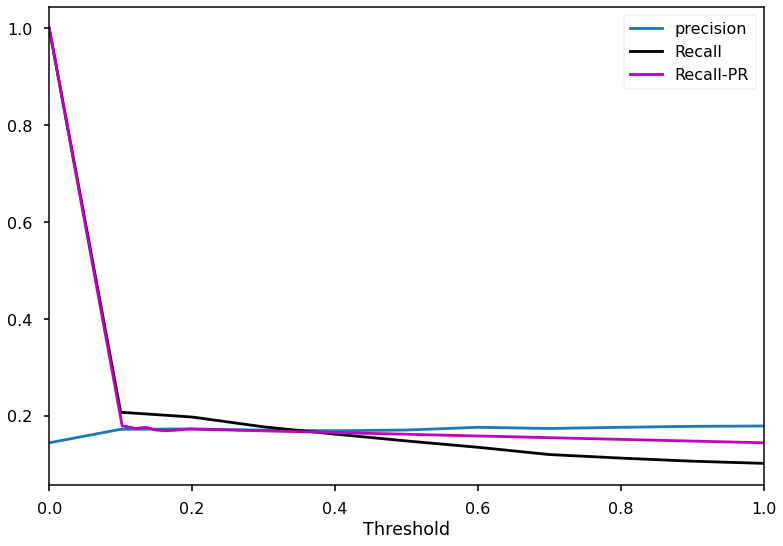

In [91]:
prre = pr_curve(labels.values,predictions)
plt.plot(prre[2],prre[0][:-1],label='precision')
plt.plot(prre[2],prre[1][:-1],'k',label='Recall')
plt.plot(prre[1],prre[0],'m',label='Recall-PR')
# plt.plot(pr,re)
plt.xlabel('Threshold')
# plt.ylabel('P')
# plt.axhline(0.14,color='r')
plt.xlim(0,1)
plt.legend()

Ok. Now random forest improves the recall-precion score (f1) compared to logistic regression, but we still want to improve the predicting capabilities of our classifier. I have tried turning bootstrapping on/off, the amount of trees, max features etc. Randomforest class also has a class_weight attribute, which applies a weight to the class. That comes in handy for our imbalanced dataset. I found that the F1 score increases to 0.15, but the ROC-AUC decreases. Instead of hyperparameter tuning, lets turn again to feature engineering.

## Random Forest with poly features

In [92]:
rf.fit(poly_features_sc,target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features=None, n_estimators=10, n_jobs=-1,
                       verbose=1)

In [93]:
poly_pred = rf.predict(poly_features_test_sc)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


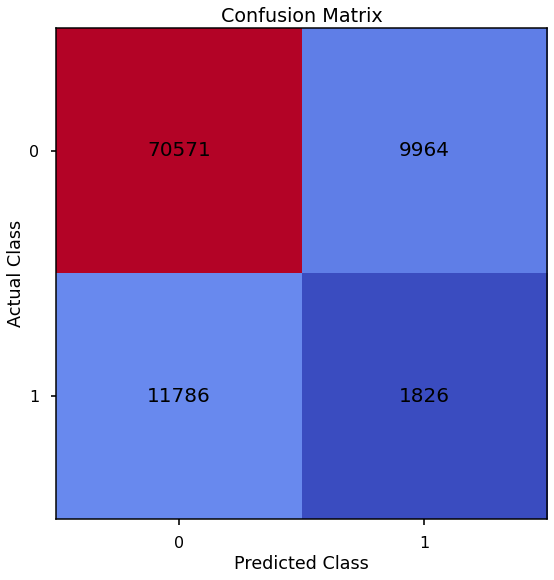

In [94]:
# Let's plot the confusion matrix
conf_matrix = confusion_matrix(labels.values,poly_pred)

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

In [95]:
balanced_accuracy_score(labels.values,predictions_cl)

0.5143238290304438

Using the dataset with higher order terms do not improve the TP, but the FN for the given threshold.
Let's add new features to the new data set, such loan/unnual income and 


# Adding new features to dataset

In [96]:
# Let's find new features which might be usefull
# This is dangerous! Do not assign a panda dataframe to another variable without using the copy method.
# If you omit this, changing the variable will also change the original dataframe. The variable is a pointer 
# to the original dataframe.
df_train_newfeat = df_train.copy()
df_train_newfeat['inc_cred_pct'] = df_train.annual_inc/df_train.loan_amnt
df_train_newfeat['inc_inst_pct'] = df_train.annual_inc/df_train.installment

In [97]:
# aligning datasets such that test dataset also has the new features
# we just added in the training data
df_train_newfeat, df_test_newfeat = df_train_newfeat.align(df_test_num,axis=1)

In [98]:
df_test_newfeat['inc_cred_pct'] = df_test.annual_inc/df_test.loan_amnt
df_test_newfeat['inc_inst_pct'] = df_test.annual_inc/df_test.installment

In [99]:
# replacing missing values and scaling data with sklearn
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = MinMaxScaler(feature_range = (0, 1))

df_train_newfeat_sc = imputer.fit_transform(df_train_newfeat)
df_train_newfeat_sc = scaler.fit_transform(df_train_newfeat_sc)

df_test_newfeat_ = imputer.fit_transform(df_test_newfeat)
df_test_newfeat_sc = scaler.fit_transform(df_test_newfeat_)

In [100]:
rf = RandomForestClassifier(n_estimators = 1, max_depth = None, bootstrap = True, max_features=None,
                            class_weight= 'balanced_subsample', verbose = 1, n_jobs = -1, max_samples = 14000, 
                            oob_score=False)
rf.fit(df_train_newfeat_sc ,target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


RandomForestClassifier(class_weight='balanced_subsample', max_features=None,
                       max_samples=14000, n_estimators=1, n_jobs=-1, verbose=1)

In [101]:
new_pred = rf.predict_proba(df_test_newfeat_sc)[:, 1]
new_pred_cl = rf.predict(df_test_newfeat_sc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


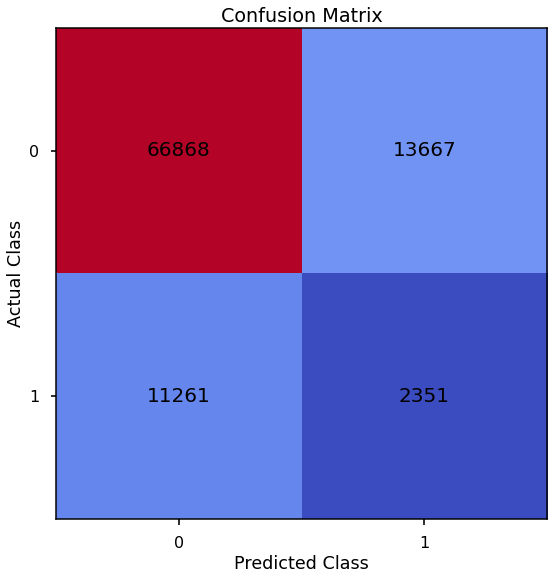

In [102]:
# Let's plot the confusion matrix
conf_matrix = confusion_matrix(labels.values,new_pred_cl)

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

Ok. We do see that the recall increases here (0.17). But something is weird here? The randomforest with a single estimator gives the highest recall, so basically a single decisiontree. Why is that? What I notice is that we get high recall values (0.22) whenever n_estimator * n_sample < total sample number. I think this has to do with the fact that our dataset is highly imbalanced. Whenever more that one estimator (tree), a majority vote is taken after a test instance is passed through the tree. Since we have a highly imbalanced set, it is highly probable that the majority of trees are going to prefer the majority class. This has to do maybe with the fact that features are chosen randomly at each node. Does the 'class_weight' attribute not account for this already? If not, is there a way to turn this random feature picking off?

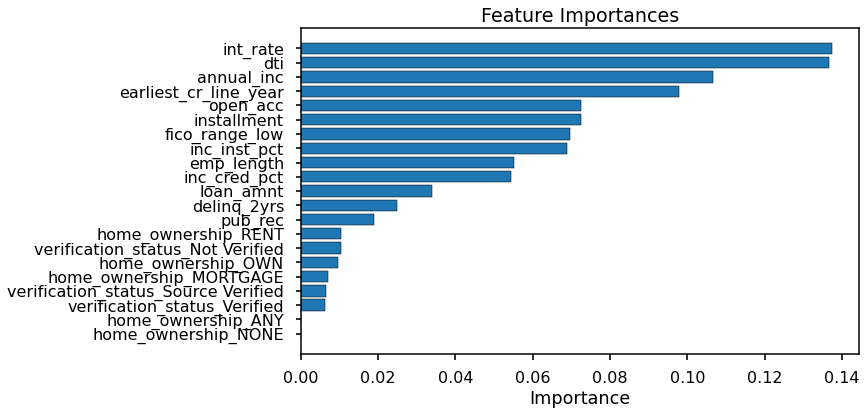

In [103]:
plot_feature_importance(df_test_newfeat.columns,rf.feature_importances_)

This is interesting: the new features we have created turn out to be important in our random forest classifier. How does it do that in detail? Using Gini impurity...wtf is that? But for now let's not waste a lot of time understanding it and save it for later
In this blog, they explain this: <br>
https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3


In [104]:
prre = pr_curve(labels.values,new_pred)
print('AUC of precision-recall curve:',auc(prre[1],prre[0]))

AUC of precision-recall curve: 0.21954922684763825


In [105]:
print('AUC of ROC:', roc_auc_score(labels,new_pred))

AUC of ROC: 0.5015063187392439


In [106]:
recall_score(labels,new_pred_cl)

0.17271525124889803

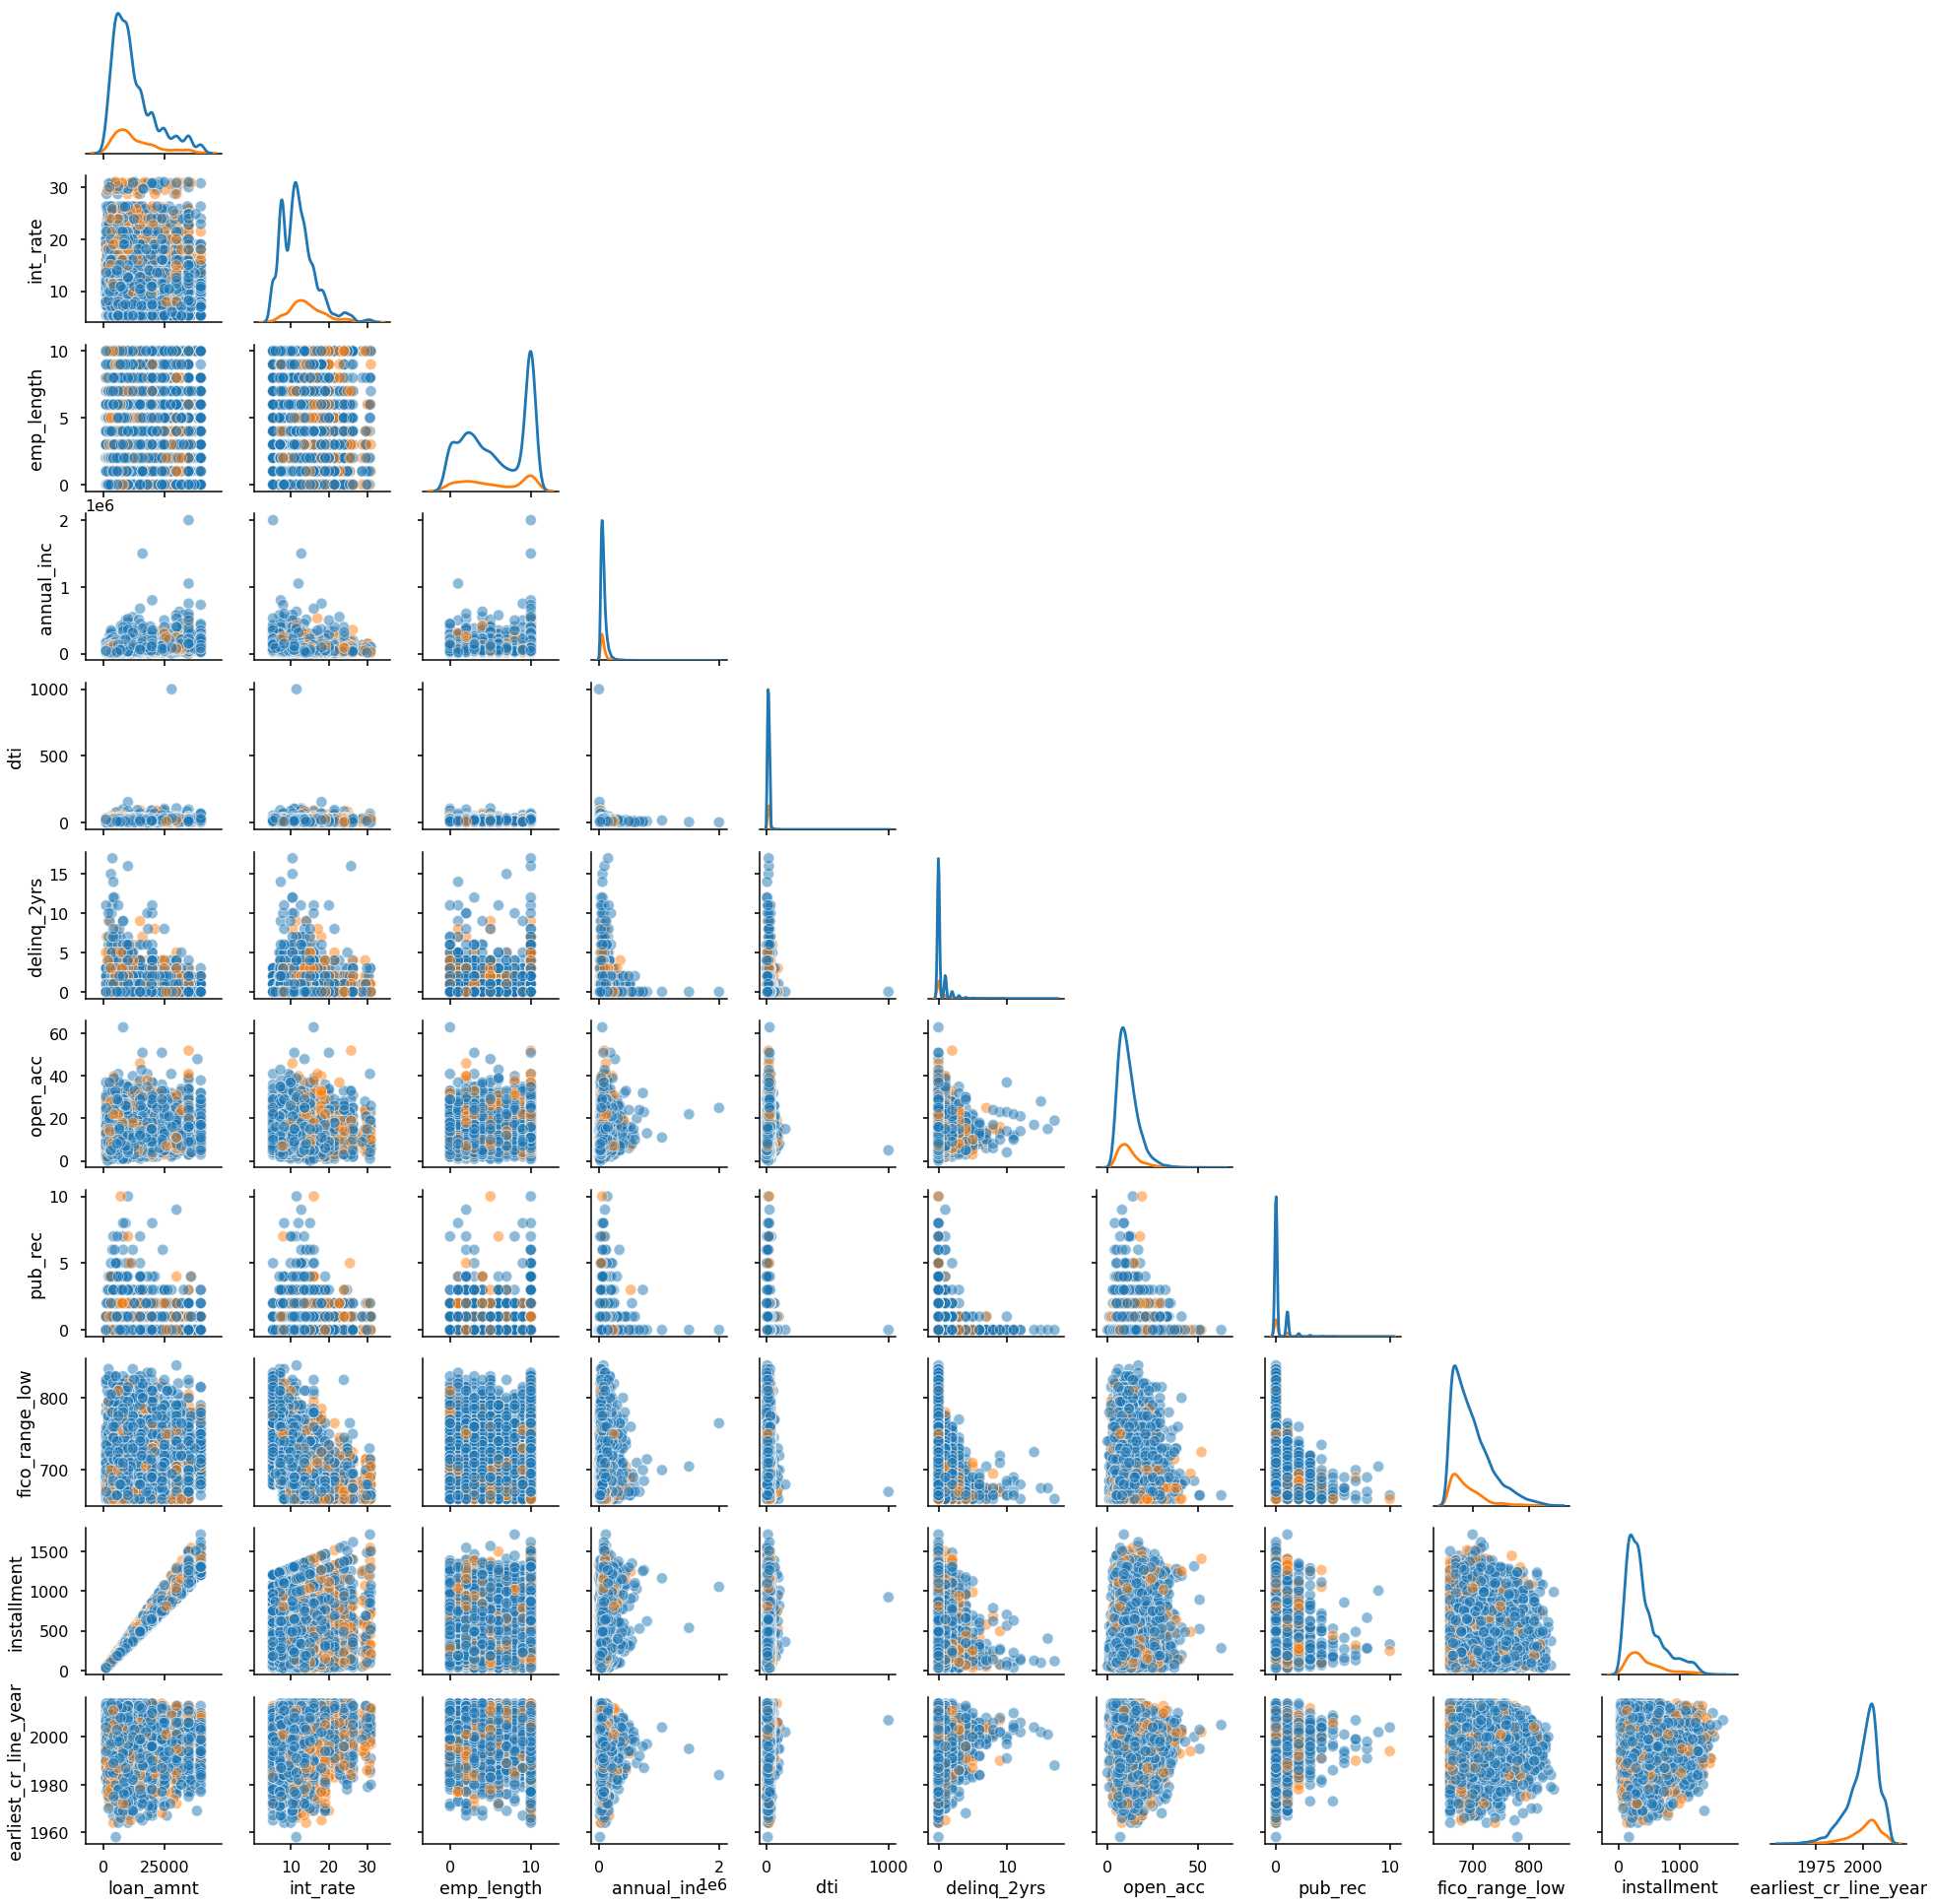

In [107]:
data_pairplot = df_train_newfeat.copy()
data_pairplot['target'] = target
g = sns.PairGrid(data_pairplot[:10000], hue="target",diag_sharey=False,corner=True,vars=features)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot,alpha = 0.5)


Hmmm, I can't see significant correlations between features by eye, except (loan_amnt-int_rate, inc_inst_pct-inc_cred_pct and maybe installment-int_rate). But little distiction in classes. This is not ideal, since our dataset is highly imbalanced!

# Over/Undersampling to balance dataset


    Over and undersampling the minority and majority class respectively makes the dataset more balanced. Therefore, we dont need to provide a class_weight parameter to the classifier. The disadvantage of Random forest with regards to our dataset is that the trees are all independent. Since there is no clear difference in the distribution of the minority and majority classes, the decision tree will have a hard time in correctly predicting the classes. Also each tree has an equal weight in to final outcome, so the "incorrect" trees are equally weighted as the correct tree, which is not what we want.
   BTW, apparently scaling is important. When leaving this out, I notice that the classifier either predicts all positive or all negative (Not true, I forget to also unscale the validtion data)
When placing the scaler before under and oversampling, I noticed that it improves the recall score (by 1/13 *100%)!

In [108]:
# Let's investigate what over and undersampling does to the distribution
data_for_samplng = df_train_newfeat.copy()

data_for_samplng = imputer.fit_transform(data_for_samplng)
over = SMOTE(sampling_strategy=0.25,k_neighbors=10)
adasyn = ADASYN(sampling_strategy=.25,n_neighbors=5)
under = RandomUnderSampler(sampling_strategy=.5)

sampled_data_over, y_reso = over.fit_resample(data_for_samplng,target)
sampled_data_under, y_resu = under.fit_resample(sampled_data_over,y_reso)
sampled_data = pd.DataFrame(sampled_data_under,columns=df_train_newfeat.columns)
sampled_data['target'] = y_resu

(array([60400.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 30200.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

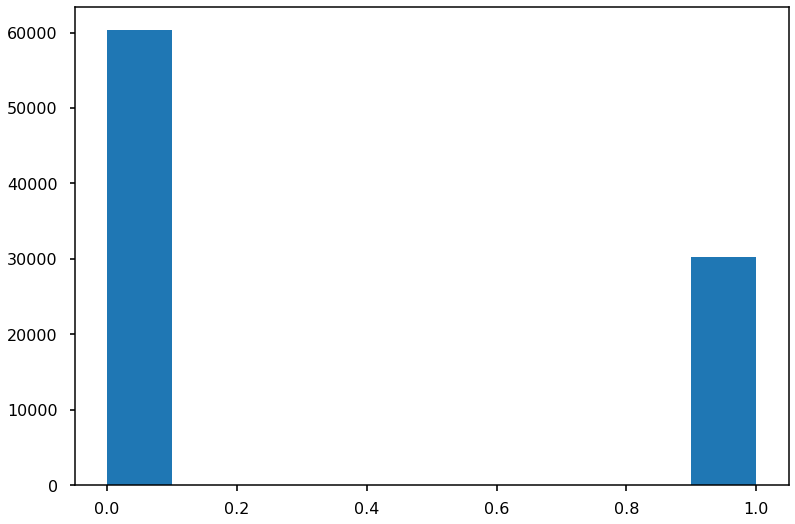

In [109]:
plt.hist(y_resu)

(0.0, 200.0)

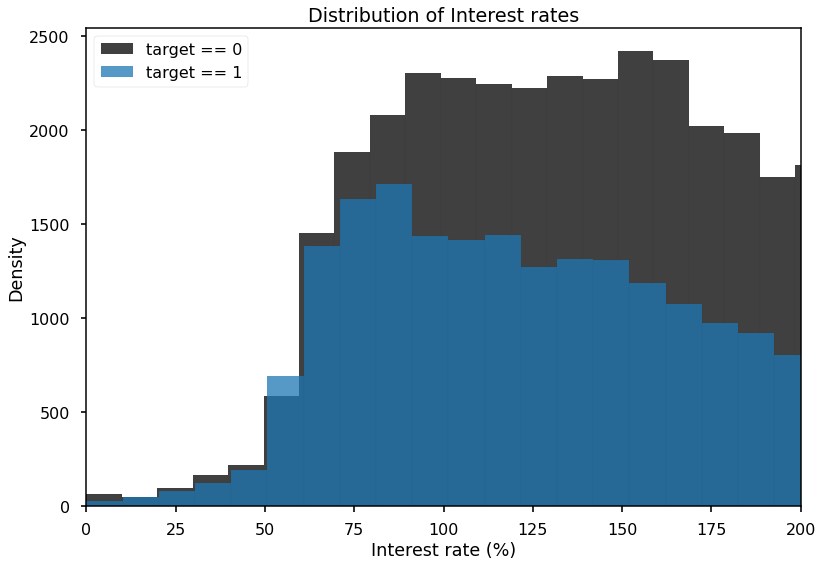

In [110]:
# Interest rate seems interesting 
# KDE plot of loans that were repaid on time

sns.histplot(sampled_data.loc[sampled_data['target'] == 0, 'inc_inst_pct'], label = 'target == 0',color='k')

# KDE plot of loans which were not repaid on time
sns.histplot(sampled_data.loc[sampled_data['target'] == 1, 'inc_inst_pct'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Interest rate (%)'); plt.ylabel('Density'); plt.title('Distribution of Interest rates');
plt.legend()
plt.xlim(0,200)

Scaling works as expected.

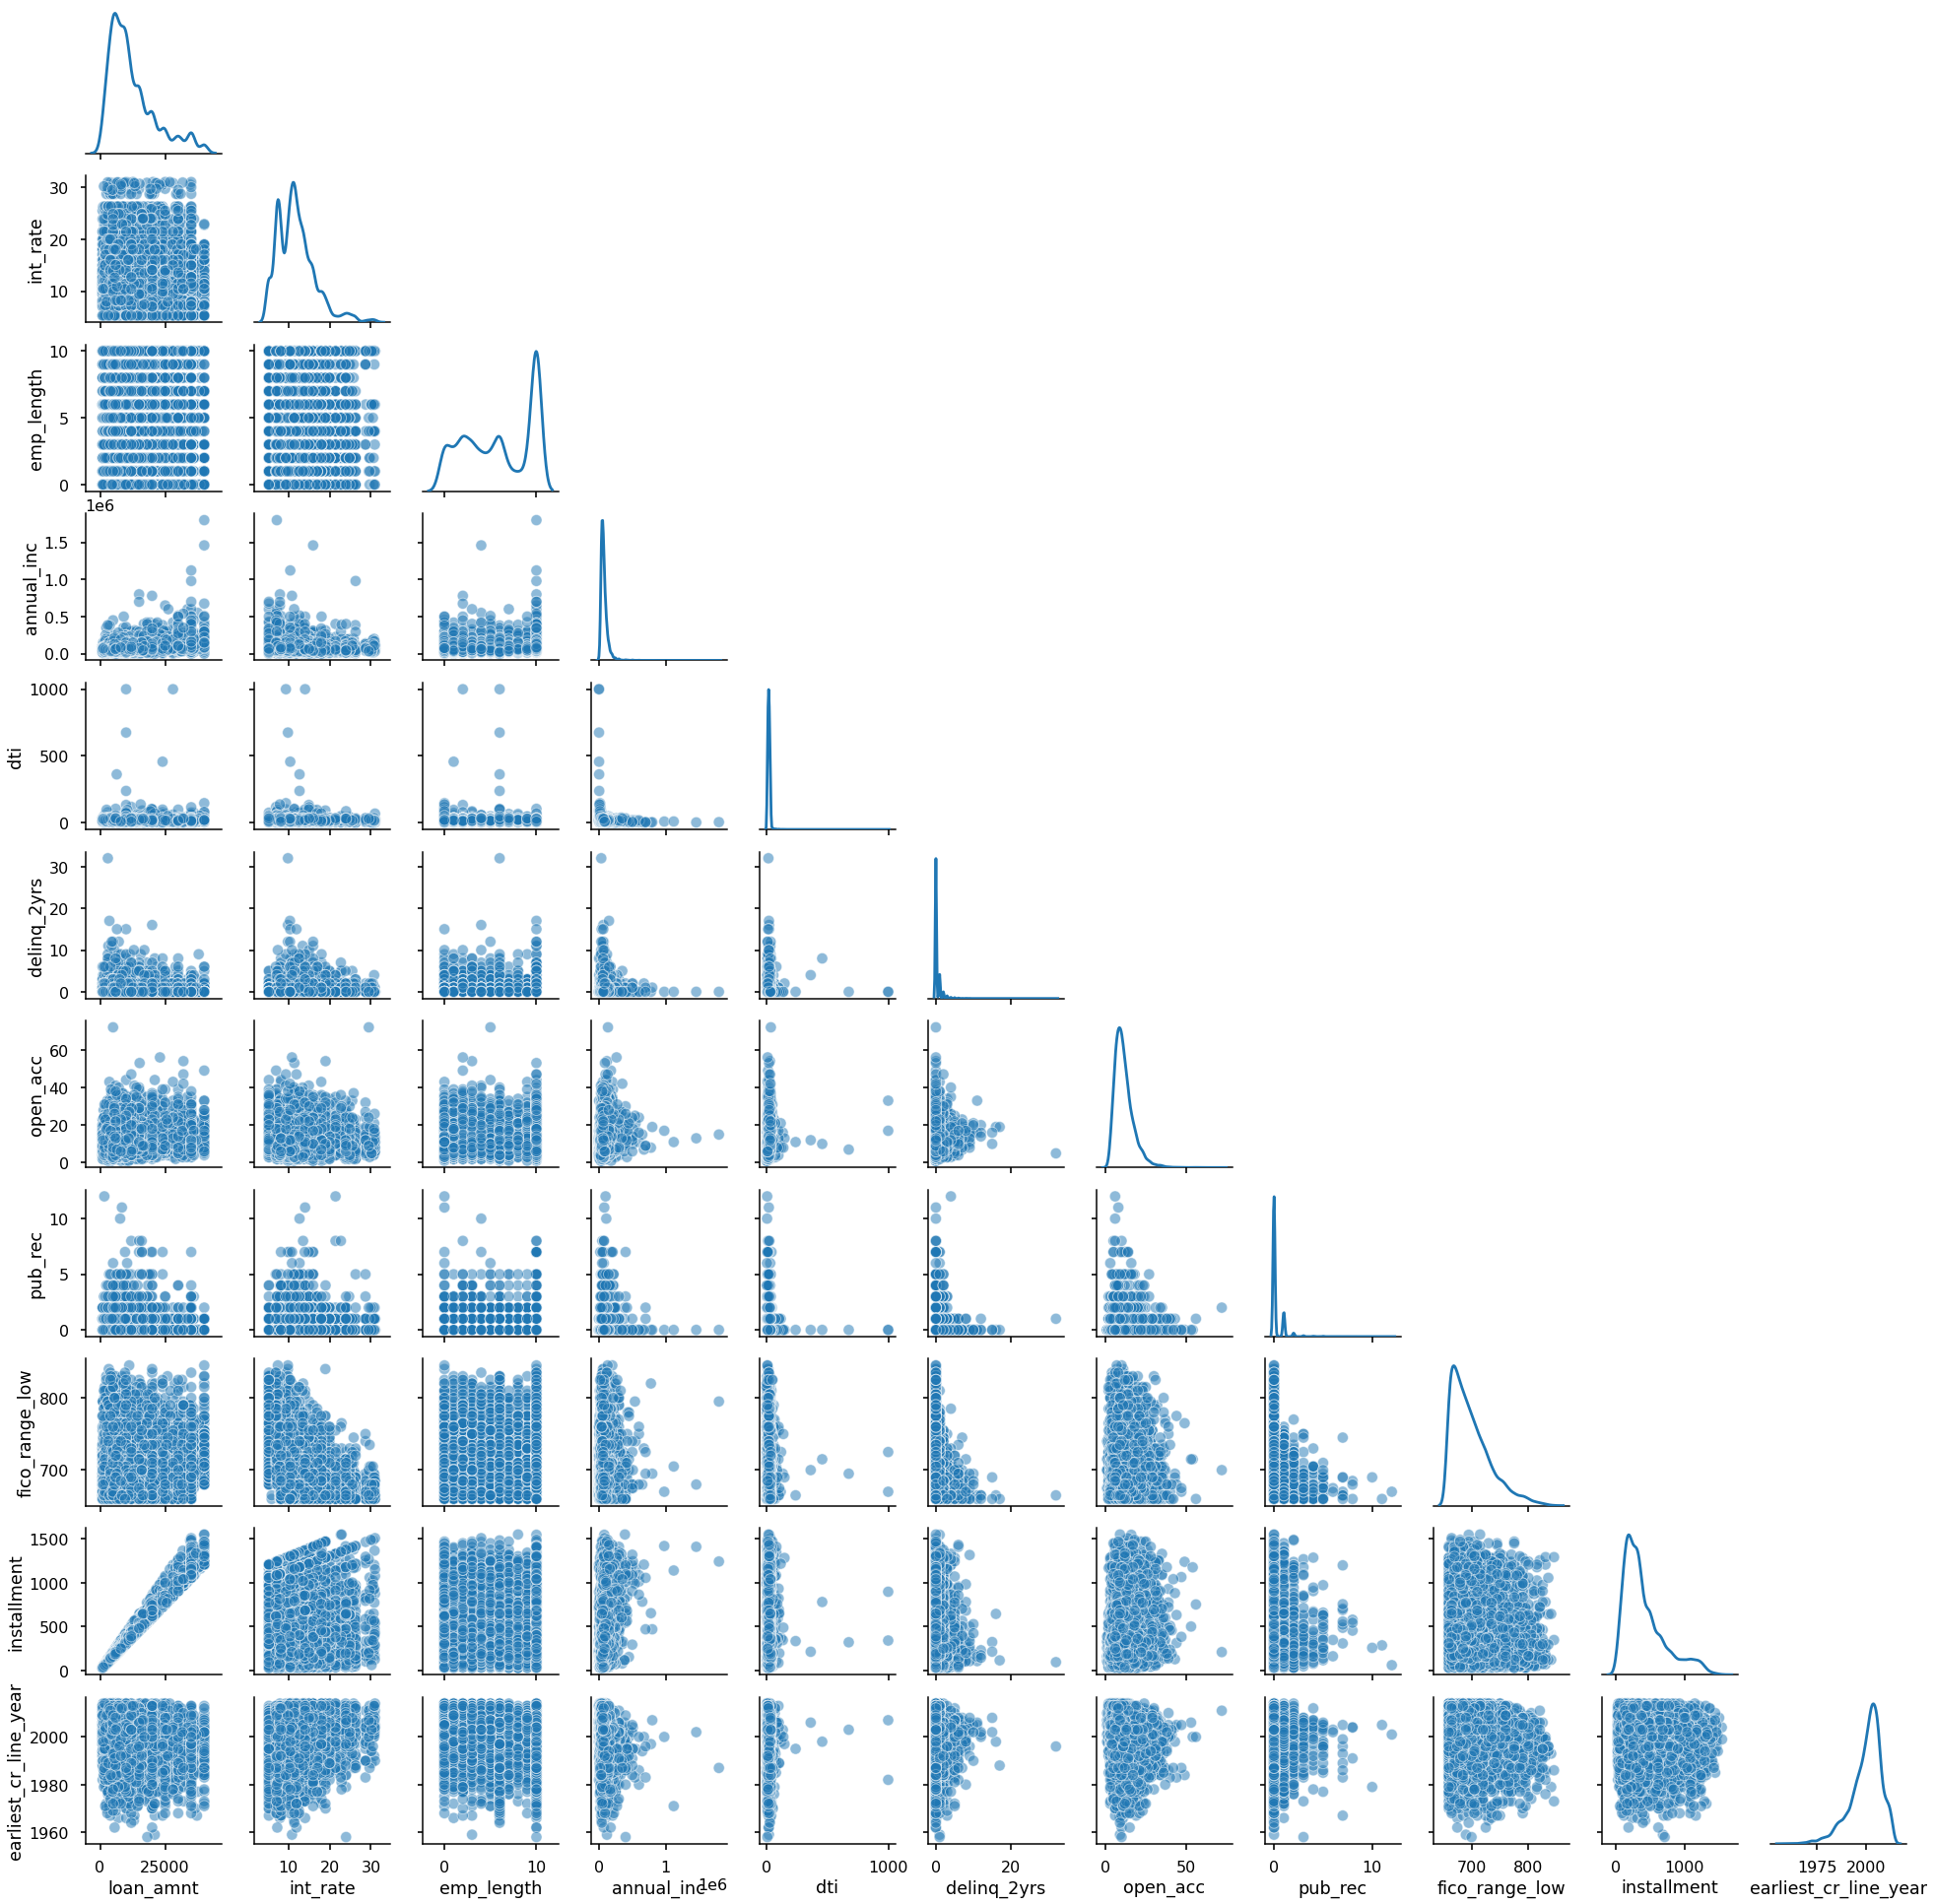

In [111]:

g = sns.PairGrid(sampled_data[:10000], hue="target",diag_sharey=False,corner=True,vars=features)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot,alpha = 0.5)



In [112]:
pd.DataFrame(sampled_data_under,columns=df_train_newfeat.columns)

annual_inc  delinq_2yrs        dti  earliest_cr_line_year  \
0       75000.000000     0.000000  17.790000            2003.000000   
1      100000.000000     0.000000  17.550000            1986.000000   
2       63000.000000     0.000000   7.140000            2011.000000   
3       45000.000000     0.000000   3.310000            1986.000000   
4       38000.000000     0.000000  20.400000            2007.000000   
...              ...          ...        ...                    ...   
90595   17000.000000     0.000000  21.513382            1987.436973   
90596   96000.000000     1.131883  25.210938            2000.906526   
90597   10005.641557     0.000000  41.779710            2001.903837   
90598  115000.000000     0.000000  11.106533            2005.057215   
90599   50000.000000     1.000000  19.685145            2004.007552   

       emp_length  fico_range_low  home_ownership_ANY  \
0       10.000000      710.000000                 0.0   
1       10.000000      815.000000                 0.0   
2        4.000000      670.000000                 0.0   
3        1.000000      690.000000                 0.0   
4       10.000000      670.000000                 0.0   
...           ...             ...                 ...   
90595    5.890757      666.502094                 0.0   
90596   10.000000      683.681170                 0.0   
90597    6.000000      738.397285                 0.0   
90598    1.047538      687.381154                 0.0   
90599    5.969793      660.000000                 0.0   

       home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OWN  ...  \
0                          1.0                  0.0            0.000000  ...   
1                          1.0                  0.0            0.000000  ...   
2                          1.0                  0.0            0.000000  ...   
3                          0.0                  0.0            1.000000  ...   
4                          0.0                  0.0            0.000000  ...   
...                        ...                  ...                 ...  ...   
90595                      0.0                  0.0            0.972689  ...   
90596                      1.0                  0.0            0.000000  ...   
90597                      0.0                  0.0            0.967946  ...   
90598                      0.0                  0.0            0.000000  ...   
90599                      1.0                  0.0            0.000000  ...   

       inc_cred_pct  inc_inst_pct  installment   int_rate     loan_amnt  \
0          4.838710    153.865091   487.440000   8.240000  15500.000000   
1          3.333333    107.842291   927.280000   7.070000  30000.000000   
2          6.562500    203.587009   309.450000   9.930000   9600.000000   
3          2.812500     81.143949   554.570000  14.990000  16000.000000   
4          3.392857    101.069206   375.980000  12.740000  11200.000000   
...             ...           ...          ...        ...           ...   
90595      2.635659     79.990930   212.524097  11.441366   6450.000000   
90596      3.000000     91.048827  1055.060695  11.475248  32000.000000   
90597      2.793959     84.149997   119.004178  11.973973   3583.972849   
90598      6.992513    201.569852   570.572521  15.050000  16447.623081   
90599      5.000000    135.448118   369.161422  19.511337  10000.000000   

        open_acc   pub_rec  verification_status_Not Verified  \
0      11.000000  0.000000                          1.000000   
1       9.000000  0.000000                          0.000000   
2       9.000000  0.000000                          0.000000   
3       6.000000  0.000000                          0.000000   
4       8.000000  1.000000                          1.000000   
...          ...       ...                               ...   
90595   3.218486  0.000000                          0.000000   
90596  13.906526  0.000000                          0.000000   
90597   1.160272  0.000000        

In [113]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = MinMaxScaler(feature_range = (0, 1))
over = SMOTE(sampling_strategy=0.25,k_neighbors=10)
under = RandomUnderSampler(sampling_strategy=.5)
model = RandomForestClassifier(n_estimators = 10, max_depth = None, bootstrap = False, max_features=None,
                            class_weight= 'balanced', verbose = 1, n_jobs = -1, max_samples = None, 
                            oob_score=False)
#  ('scaler',scaler),
steps = [('imp',imputer),('over',over), ('under',under),  ('model', model)]
pipeline = Pipeline(steps=steps)
pipeline.fit(df_train_newfeat,target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.6s finished


Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                ('over', SMOTE(k_neighbors=10, sampling_strategy=0.25)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('model',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        max_features=None, n_estimators=10,
                                        n_jobs=-1, verbose=1))])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


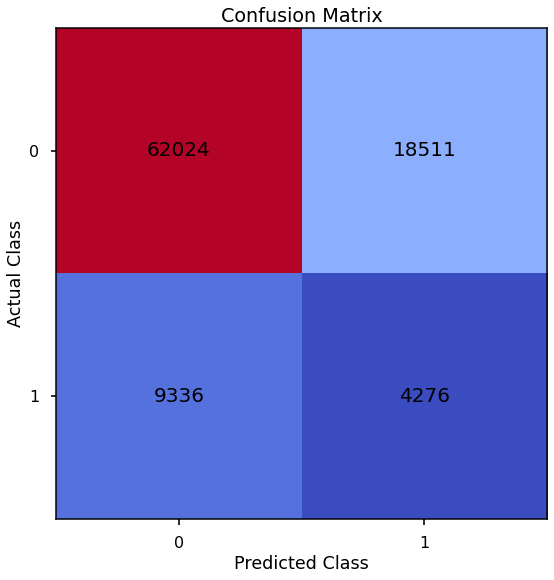

In [114]:
# Let's plot the confusion matrix
conf_matrix = confusion_matrix(labels.values,model.predict(df_test_newfeat_))

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

In [115]:
print('AUC of ROC:', roc_auc_score(labels,model.predict_proba(df_test_newfeat_)[:,1]))

AUC of ROC: 0.5524754729889034


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


In [116]:
prre = pr_curve(labels.values,model.predict_proba(df_test_newfeat_)[:,1])
print('AUC of precision-recall curve:',auc(prre[1],prre[0]))

AUC of precision-recall curve: 0.26642963128559416


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


In [152]:
print('recall score:',recall_score(labels.values,model.predict(df_test_newfeat_)))

recall score: 0.31413458712900383


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


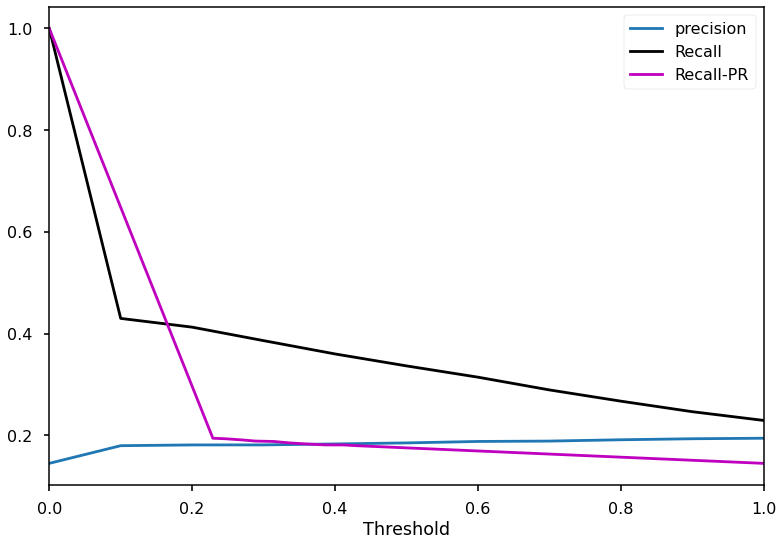

In [118]:
plt.plot(prre[2],prre[0][:-1],label='precision')
plt.plot(prre[2],prre[1][:-1],'k',label='Recall')
plt.plot(prre[1],prre[0],'m',label='Recall-PR')
# plt.plot(pr,re)
plt.xlabel('Threshold')
# plt.ylabel('P')
# plt.axhline(0.14,color='r')
plt.xlim(0,1)
plt.legend()

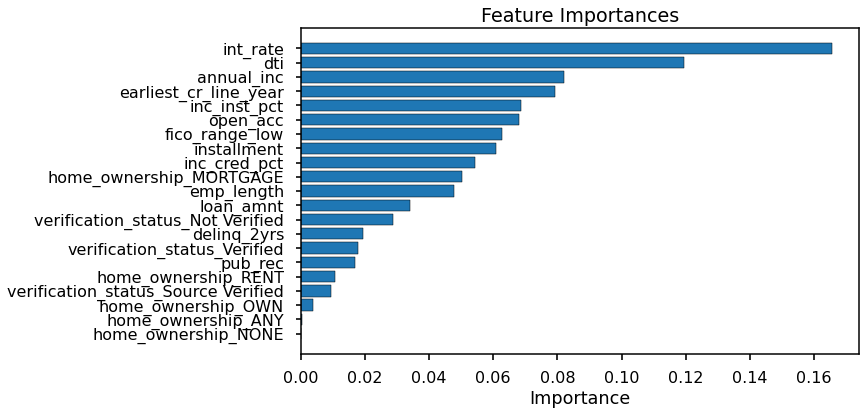

In [119]:
plot_feature_importance(df_test_newfeat.columns,model.feature_importances_)

Over and undersampling helps to increase the recall (TP) at the expense of the precision (more False postive). False Positive are not good either, because it prevents people from obtaining loans, which is bad. Ideally we want to minimize false positive and maximize true positives.

# Let's try gradient boosting

In [120]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = MinMaxScaler(feature_range = (0, 1))
over = SMOTE(sampling_strategy=.5,k_neighbors=10)
under = RandomUnderSampler(sampling_strategy=.5)
model_gbc = GradientBoostingClassifier(n_estimators = 200,max_depth=5,verbose=1)
#    ('under',under), ('scaler',scaler)
steps = [('imp',imputer),('over',over) ,('model', model_gbc)]
pipeline = Pipeline(steps=steps)
pipeline.fit(df_train_newfeat,target)

      Iter       Train Loss   Remaining Time 
         1           1.2046            3.78m
         2           1.1458            3.75m
         3           1.1008            3.73m
         4           1.0629            3.73m
         5           1.0282            3.73m
         6           0.9965            3.71m
         7           0.9707            3.71m
         8           0.9523            3.74m
         9           0.9288            3.73m
        10           0.9159            3.72m
        20           0.7767            3.51m
        30           0.7161            3.36m
        40           0.6801            3.16m
        50           0.6597            2.96m
        60           0.6449            2.77m
        70           0.6339            2.58m
        80           0.6272            2.39m
        90           0.6210            2.19m
       100           0.6168            2.00m
       200           0.5955            0.00s


Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                ('over', SMOTE(k_neighbors=10, sampling_strategy=0.5)),
                ('model',
                 GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                            verbose=1))])

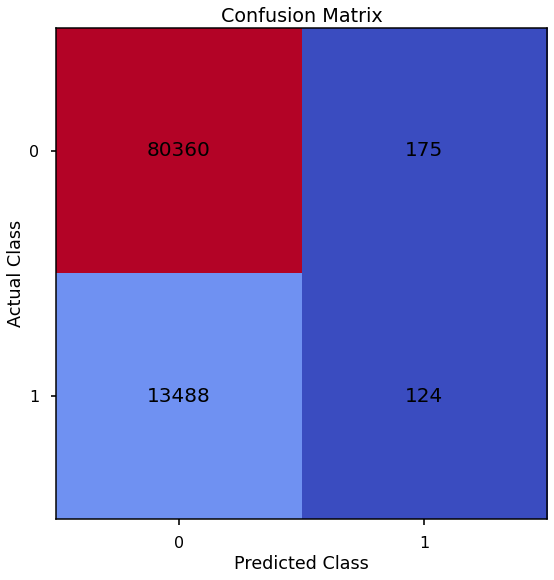

In [121]:
# Let's plot the confusion matrix


conf_matrix = confusion_matrix(labels.values,model_gbc.predict(df_test_newfeat_))

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

In [122]:
prre = pr_curve(labels.values,model_gbc.predict_proba(df_test_newfeat_)[:,1])
print('AUC of precision-recall curve:',auc(prre[1],prre[0]))

AUC of precision-recall curve: 0.25772726702501886


In [123]:
# # Lets do a parameter sweep
# parameters = {'model__n_estimators':[100,1000,3000], 'model__learning_rate':[0.001,0.1,10],
#              'model__max_depth':[1,5,9]}

# clf = GridSearchCV(pipeline, parameters)

# clf.fit(df_train_newfeat,target)

# XGB classifier

As a last resort, let's see how extreme gradient boosting performs!

In [145]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = MinMaxScaler(feature_range = (0, 1))
over = SMOTE(sampling_strategy= .25,k_neighbors=10)
under = RandomUnderSampler(sampling_strategy=.8)
model_xgb = XGBClassifier(scale_pos_weight=1,subsample=0.6,eta=0.6, disable_default_eval_metric=1)
#    ('under',under), ('scaler',scaler), ('over',over) , ('under',under),
steps = [('imp',imputer), ('under',under), ('model', model_xgb)]
pipeline = Pipeline(steps=steps)
pipeline.fit(df_train_newfeat,target)


Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                ('under', RandomUnderSampler(sampling_strategy=0.8)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1,
                               disable_default_eval_metric=1,
                               early_stopping_rounds=None,
                               enable_categorical=False, eta=0.6,
                               eval_metric=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.600000024, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

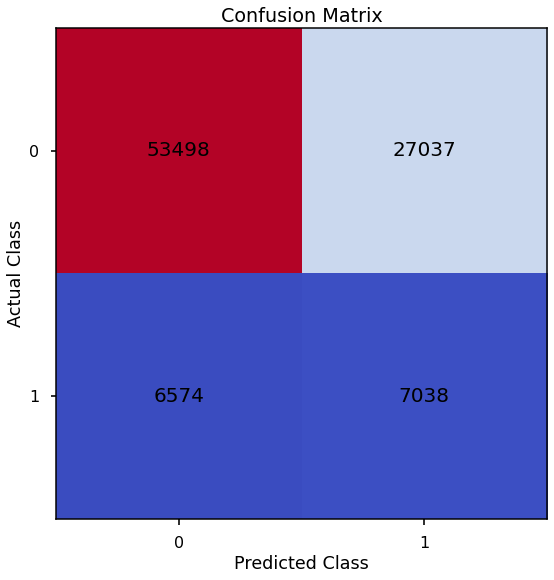

In [146]:
# Let's plot the confusion matrix


conf_matrix = confusion_matrix(labels.values,model_xgb.predict(df_test_newfeat_))

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

In [147]:
prre = pr_curve(labels.values,model_xgb.predict_proba(df_test_newfeat_)[:,1])
print('AUC of precision-recall curve:',auc(prre[1],prre[0]))

AUC of precision-recall curve: 0.21215550314042966


In [150]:
recall_score(labels.values,model_xgb.predict(df_test_newfeat_))

0.5170437848956803